In [1]:
# !pip3 install nltk
# !pip3 install Sastrawi
# !pip3 install wordcloud
import pandas as pd
import numpy as np
import os
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
pd.set_option('display.max_columns', 50)

## Load Key Norm into RAM

In [2]:
PATH_TO_KEY_NORM_FILE = './dictionary/key_norm.csv'

key_norm = pd.read_csv(PATH_TO_KEY_NORM_FILE).drop(['_id'], axis=1)
key_norm.head()

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi


In [3]:
key_norm_dict = {key_norm['singkat'][i]:key_norm['hasil'][i] for i in range(len(key_norm))}
key_norm_dict

{'abis': 'habis',
 'accent': 'tekanan',
 'accept': 'terima',
 'accident': 'kecelakaan',
 'achievement': 'prestasi',
 'acra': 'acara',
 'acrany': 'acaranya',
 'acrnya': 'acaranya',
 'action': 'aksi',
 'active': 'aktif',
 'activity': 'aktivitas',
 'actually': 'sebenarnya',
 'actualy': 'sebenarnya',
 'ad': 'ada',
 'ade': 'ada',
 'adult': 'dewasa',
 'adventure': 'petualangan',
 'adventurer': 'petualang',
 'advice': 'nasehat',
 'after': 'setelah',
 'afternun': 'sore',
 'again': 'lagi',
 'agency': 'perwakilan',
 'agent': 'agen',
 'agk': 'agak',
 'agktn': 'angkatan',
 'agree': 'setuju',
 'agreement': 'persetujuan',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'aje': 'saja',
 'ajeh': 'saja',
 'ajk': 'ajak',
 'ak': 'saya',
 'akeh': 'banyak',
 'akhire': 'akhirnya',
 'aktifkn': 'aktifkan',
 'aku': 'saya',
 'alhamdlh': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'almost': 'hampir',
 'almt': 'alamat',
 'alone': 'sendiri',
 'alsn': 'alasan',
 'also': 'juga',
 'always': '

## Read Data

In [4]:
## Hard coded constants for locating the inputs
PATH_TO_NEW_SENTIMENT_FOLDER = './'
NEGATIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'negative_tweet_progress_iv.csv'
POSITIVE_DATASET = PATH_TO_NEW_SENTIMENT_FOLDER + 'positive_tweet_progress_iv.csv'

In [5]:
negative_data = pd.read_csv(NEGATIVE_DATASET)
positive_data = pd.read_csv(POSITIVE_DATASET)

In [6]:
negative_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'conversation_id',
       'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name',
       'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'location', 'hashtags', 'link',
       'retweet', 'quote_url', 'video', 'profile_image_url',
       'Unnamed: 0.1.1.1', 'gif_thumb', 'gif_url', 'has_parent_tweet',
       'is_quote_status', 'is_reply_to', 'quote_id', 'replies', 'tags',
       'video_thumb', 'video_url'],
      dtype='object')

In [7]:
positive_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'conversation_id',
       'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name',
       'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'location', 'hashtags', 'link',
       'retweet', 'quote_url', 'video', 'profile_image_url',
       'Unnamed: 0.1.1.1', 'gif_thumb', 'gif_url', 'has_parent_tweet',
       'is_quote_status', 'is_reply_to', 'quote_id', 'replies', 'tags',
       'video_thumb', 'video_url'],
      dtype='object')

In [8]:
negative_data['is_depressed'] = True
print(negative_data.count())
negative_data.head()

Unnamed: 0           357
Unnamed: 0.1         357
Unnamed: 0.1.1       119
id                   357
conversation_id      357
created_at           357
date                 357
time                 357
timezone             357
user_id              357
username             357
name                 357
place                  0
tweet                357
mentions             125
urls                 357
photos               357
replies_count        357
retweets_count       357
likes_count          357
location               0
hashtags             357
link                 357
retweet                0
quote_url              2
video                300
profile_image_url    300
Unnamed: 0.1.1.1       0
gif_thumb              0
gif_url                0
has_parent_tweet      57
is_quote_status       57
is_reply_to           57
quote_id              57
replies               57
tags                  57
video_thumb            0
video_url              0
is_depressed         357
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,Unnamed: 0.1.1.1,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,0,0,0.0,1127948727660961792,1127946700813770752,1557758907000,2019-05-13,21:48:27,WIB,1118865253305999360,xxdhean,BUNDANYA BYOUNGGON ☄,NaN,"Hari selasa babe YG bikin ""new line up"" gue mi...",NaN,[],[],1,0,0,NaN,[],https://twitter.com/xxdhean/status/11279487276...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112698373...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,1,1,3.0,1127896201230032896,1127896201230032896,1557746384000,2019-05-13,18:19:44,WIB,80029283,raishaula,Raisha Ula,NaN,Brgini ternyata rasanya percaya cerita masalah...,NaN,[],[],1,0,0,NaN,[],https://twitter.com/raishaula/status/112789620...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/110591067...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2,2,4.0,1127885187461697537,1127883684994899968,1557743758000,2019-05-13,17:35:58,WIB,710061963175309312,bung_tahu,Look,NaN,Ada ga ya twitternya bili... Pengen bilangin d...,['vivacoid'],[],[],0,0,0,NaN,[],https://twitter.com/Bung_tahu/status/112788518...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112789651...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,3,3,5.0,1127852789374144512,1127852789374144512,1557736034000,2019-05-13,15:27:14,WIB,2791266684,au_ah_elap06,GATAUAH,NaN,Gw sama kaya ka karin ngerti ttng depresi pas ...,NaN,['https://twitter.com/awkarin/status/112740051...,[],0,0,0,NaN,[],https://twitter.com/AU_AH_ELAP06/status/112785...,NaN,https://twitter.com/awkarin/status/11274005183...,0.0,https://pbs.twimg.com/profile_images/112251628...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,4,4,6.0,1127793687516336129,1127793687516336129,1557721943000,2019-05-13,11:32:23,WIB,1047208017064689664,askfess,ASKFESS,NaN,#mnfs tb² pengen bunuh diri,NaN,[],[],25,0,5,NaN,['#mnfs'],https://twitter.com/askfess/status/11277936875...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/109586822...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [9]:
positive_data['is_depressed'] = False
print(positive_data.count())
positive_data.head()

Unnamed: 0           478
Unnamed: 0.1         478
Unnamed: 0.1.1       133
id                   478
conversation_id      478
created_at           478
date                 478
time                 478
timezone             478
user_id              478
username             478
name                 478
place                  0
tweet                478
mentions             277
urls                 478
photos               478
replies_count        478
retweets_count       478
likes_count          478
location               0
hashtags             478
link                 478
retweet                0
quote_url              9
video                309
profile_image_url    309
Unnamed: 0.1.1.1       0
gif_thumb              0
gif_url                0
has_parent_tweet     169
is_quote_status      169
is_reply_to          169
quote_id             169
replies              169
tags                 169
video_thumb            0
video_url              0
is_depressed         478
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,Unnamed: 0.1.1.1,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,0,0,1.0,1127935635400957954,1127935635400957954,1557755786000,2019-05-13,20:56:26,WIB,2262992802,mirza_husainiy,Mirza Quanta Ahady H,NaN,Disadari atau tidak Kadang apa yg kita lihat s...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/mirza_husainiy/status/1127...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/896707936...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,1,2.0,1127933327736881152,1127926425296617472,1557755235000,2019-05-13,20:47:15,WIB,839082153677725697,lvlia00,ʚ ʟɪᴀ ɞ,NaN,Huhu berasa liat orang diputusin pacar lewat t...,NaN,[],['https://pbs.twimg.com/media/D6c5YDlU0AA9ont....,1,0,0,NaN,[],https://twitter.com/LVLIA00/status/11279333277...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112423003...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,2,7.0,1127650851529453568,1127648432976326657,1557687888000,2019-05-13,02:04:48,WIB,1052774662801784832,yeacryn,obyn #MILLARDALEBACK #ADVISBACK,NaN,"jangan pernah menyerah yaaahh, sekalipun km bu...",['rpautobase'],[],[],0,0,0,NaN,[],https://twitter.com/yeacryn/status/11276508515...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112784127...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,3,24.0,1127262863112974338,1127210272848891905,1557595384000,2019-05-12,00:23:04,WIB,967450696692899840,sszc_01,Zasvicha,NaN,Pasti sudah ga bisa tidur tuh anak.. semoga aj...,"['hana_4taa', 'sirodjudin01', 'rizmawidiono', ...",[],[],5,3,16,NaN,[],https://twitter.com/SSZC_01/status/11272628631...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/104642351...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,4,31.0,1126894271368314882,1126867496454082560,1557507505000,2019-05-10,23:58:25,WIB,3396925817,ayukurniasihh,🍩🍫🍞🍔🍗🍜🌭🍦🍨🍷🍶☕,NaN,jare pengen bunuh diri,['skkkrrrrttt'],[],[],1,0,0,NaN,[],https://twitter.com/ayukurniasihh/status/11268...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112606534...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [10]:
data = pd.DataFrame(positive_data,)
data = data.append(negative_data)
print(data.count())
data.head()

Unnamed: 0           835
Unnamed: 0.1         835
Unnamed: 0.1.1       252
id                   835
conversation_id      835
created_at           835
date                 835
time                 835
timezone             835
user_id              835
username             835
name                 835
place                  0
tweet                835
mentions             402
urls                 835
photos               835
replies_count        835
retweets_count       835
likes_count          835
location               0
hashtags             835
link                 835
retweet                0
quote_url             11
video                609
profile_image_url    609
Unnamed: 0.1.1.1       0
gif_thumb              0
gif_url                0
has_parent_tweet     226
is_quote_status      226
is_reply_to          226
quote_id             226
replies              226
tags                 226
video_thumb            0
video_url              0
is_depressed         835
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video,profile_image_url,Unnamed: 0.1.1.1,gif_thumb,gif_url,has_parent_tweet,is_quote_status,is_reply_to,quote_id,replies,tags,video_thumb,video_url,is_depressed
0,0,0,1.0,1127935635400957954,1127935635400957954,1557755786000,2019-05-13,20:56:26,WIB,2262992802,mirza_husainiy,Mirza Quanta Ahady H,NaN,Disadari atau tidak Kadang apa yg kita lihat s...,NaN,[],[],0,0,0,NaN,[],https://twitter.com/mirza_husainiy/status/1127...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/896707936...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,1,2.0,1127933327736881152,1127926425296617472,1557755235000,2019-05-13,20:47:15,WIB,839082153677725697,lvlia00,ʚ ʟɪᴀ ɞ,NaN,Huhu berasa liat orang diputusin pacar lewat t...,NaN,[],['https://pbs.twimg.com/media/D6c5YDlU0AA9ont....,1,0,0,NaN,[],https://twitter.com/LVLIA00/status/11279333277...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112423003...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,2,7.0,1127650851529453568,1127648432976326657,1557687888000,2019-05-13,02:04:48,WIB,1052774662801784832,yeacryn,obyn #MILLARDALEBACK #ADVISBACK,NaN,"jangan pernah menyerah yaaahh, sekalipun km bu...",['rpautobase'],[],[],0,0,0,NaN,[],https://twitter.com/yeacryn/status/11276508515...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112784127...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,3,24.0,1127262863112974338,1127210272848891905,1557595384000,2019-05-12,00:23:04,WIB,967450696692899840,sszc_01,Zasvicha,NaN,Pasti sudah ga bisa tidur tuh anak.. semoga aj...,"['hana_4taa', 'sirodjudin01', 'rizmawidiono', ...",[],[],5,3,16,NaN,[],https://twitter.com/SSZC_01/status/11272628631...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/104642351...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,4,31.0,1126894271368314882,1126867496454082560,1557507505000,2019-05-10,23:58:25,WIB,3396925817,ayukurniasihh,🍩🍫🍞🍔🍗🍜🌭🍦🍨🍷🍶☕,NaN,jare pengen bunuh diri,['skkkrrrrttt'],[],[],1,0,0,NaN,[],https://twitter.com/ayukurniasihh/status/11268...,NaN,NaN,0.0,https://pbs.twimg.com/profile_images/112606534...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Preprocessing Data

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

import re

stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh']
 
# Tambahkan Stopword Baru
stop_words = stop_factory.get_stop_words()+more_stopword

# Create StopWord Removal using our own Stop words
stop_word_remover = StopWordRemover(ArrayDictionary(stop_words))

# Create stemmer
stemmer = StemmerFactory().create_stemmer()

def formalize(word):
    if word in key_norm_dict:
        return key_norm_dict[word]
    return word

def preprocess_tweet(tweet, debug = False):
    if debug: print(tweet, end="\n\n")
    
    # Lower casing
    clean_tweet = tweet.lower() #lowercase
    
    # URL Removal and Username removal
    clean_tweet = re.sub(r"(?:\@|https?\://)\S+", " ", clean_tweet)
    if debug: print('After URL and username removal: ', clean_tweet, end="\n\n")
    
    # Punctuation removal
    clean_tweet = re.sub(r'[^\w\s]',' ',clean_tweet)
    if debug: print('After punctuation removal: ', clean_tweet, end="\n\n")
    
    # Extra space removal
    clean_tweet = re.sub('\s+', ' ', clean_tweet)
    if debug: print('After extra space removal: ', clean_tweet, end="\n\n")
    
     # Trimming
    clean_tweet = clean_tweet.strip()
    if debug: print('After trimming: ', clean_tweet)
         
    # Transforming informal words to formal words
    clean_tweet = " ".join([formalize(word) for word in word_tokenize(clean_tweet)])
    if debug: print('After transofrming informal words: ', clean_tweet, end="\n\n")
     
    # Stop words removal
    clean_tweet = stop_word_remover.remove(clean_tweet)
    if debug: print('After stop words removal: ', clean_tweet, end="\n\n")
    
    # Stemming
    clean_tweet = stemmer.stem(clean_tweet)
    if debug: print('After stemming: ', clean_tweet, end="\n\n")
    
    if debug: print()
    
    return clean_tweet

In [12]:
cleaned = []
for idx, tweet in enumerate(data['tweet']):
    print('{}/{}'.format(idx, len(data['tweet'])))
    cleaned.append(preprocess_tweet(tweet, True))
    print()
    
cleaned

0/835
Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri  Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai?  Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?

After URL and username removal:  disadari atau tidak kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri  kita boleh sedih sampe pengen bunuh diri apa dengan gitu selesai?  bangkit lah itu hanya sebagian kecil kehidupan yo ngono kui urip 😅 seru kan?

After punctuation removal:  disadari atau tidak kadang apa yg kita lihat sebagai  kerusakan    penyimpangan itu sebenarnya karena ulah kita sendiri  kita boleh sedih sampe pengen bunuh diri apa dengan gitu selesai   bangkit lah itu hanya sebagian kecil kehidupan yo ngono kui urip   seru kan 

After extra space removal:  disadari atau tidak kadang apa yg kita lihat sebagai kerusakan penyimpangan itu sebenarnya karena ulah kita

After stemming:  pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri



8/835
tangkap..  jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku BOM saja nih org dah gelap mata tuk raih tujuan .inget ye  ..surat alfathir ayat 43 Rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After URL and username removal:  tangkap..  jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku bom saja nih org dah gelap mata tuk raih tujuan .inget ye  ..surat alfathir ayat 43 rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After punctuation removal:  tangkap    jgn pernah diliput media pengen terkenal dgn cara bunuh diri kaya pelaku bom saja nih org dah gelap mata tuk raih tujuan  inget ye    surat alfathir ayat 43 rencana jahat takan menimpa kecuali yg mrncanakanya sendiri

After extra space removal:  tangkap jgn pernah diliput media pengen terkenal dgn cara

After stemming:  jaman sekarang teroris kejahatanya bukan teror kaya bom bunuh diri bawa kabur lembar c1 tertawa takut lemes habis cair kamibersamafpi pic twitter com 9h6hok8owh



14/835
" seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga"

After URL and username removal:  " seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga"

After punctuation removal:    seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga 

After extra space removal:   seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga 

After trimming:  seorang pemuda nekad melakukan aksi bunuh diri karna pengen cpat2 masuk surga
After transofrming informal words:  seorang pemuda nekad melakukan aksi bunuh diri karena ingin cpat2 masuk surga

After stop words removal:  seorang pemuda nekad melakukan aksi bunuh diri ingin cpat2 masuk surga

After stemming:  orang pemuda nekad laku aksi bunuh diri ingin cpat2 masuk surga



15/

After stemming:  kesel tingkat dewa zeus ketika nonton bioskop pas jalan lobby studio ketemu orang baru kelar nonton eh sedih iron man nya mati walah gustiiiii tidak suek suek tiket



20/835
Pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After URL and username removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After punctuation removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After extra space removal:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm

After trimming:  pengen bilang sedih kali karena ironman mati tapi ga dibolehin spoiler hmm
After transofrming informal words:  ingin bilang sedih kali karena ironman mati tapi tidak dibolehin spoiler hmm

After stop words removal:  bilang sedih kali ironman mati tidak dibolehin spoiler hmm

After stemming:  bilang sedih kali ironman mati tidak dibolehin spoiler hmm



21/835
Nonton #Possessed di Nexflix itu: Ep

After stemming:  terus tadi cerita emaknya datang tuh lihat anak mati minta sama mungkin kalau manusia ngomong dong anak kenapa natap terus sambil meong2 begitu sedih lah tokay banget kucing garong



27/835
Sedih denger berita di tv ada KPPS skitar 103 orng yg meninggal akibat kelalahan.  Gw dlam hati pengen gitu dnger kabar NETIZEN MATI AKIBAT KELELAHAN NGEEBACOOT tntng pilpres.  Kalo udah nyoblos yaa udaah. Kmu kira bacotmu di sosmed bisa ngubah nasib negara ? Goooblwuok.

After URL and username removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan.  gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres.  kalo udah nyoblos yaa udaah. kmu kira bacotmu di sosmed bisa ngubah nasib negara ? goooblwuok.

After punctuation removal:  sedih denger berita di tv ada kpps skitar 103 orng yg meninggal akibat kelalahan   gw dlam hati pengen gitu dnger kabar netizen mati akibat kelelahan ngeebacoot tntng pilpres   kalo uda

After stemming:  iya muka bule menang banget postur pas ahh sedih kalau ingat 16 tahun bagaimana kalau sudah masuk umur 20an mati iya sih colong bighit kan niat masih ingin nyembunyiin



32/835
Akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. Trus pasang di social media seeeolaaaah dianyaa pahlawaan. Uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After URL and username removal:  akuuu jugaaaa dapet yg begituaaan..dateng ke site aku, pake baju sobek2, nyeker alias barefoot, foto muke sedih ama hiu mati 🤔🦈. trus pasang di social media seeeolaaaah dianyaa pahlawaan. uda pengen aku lempar pake hiu mati yg gedenya 2 meter.

After punctuation removal:  akuuu jugaaaa dapet yg begituaaan  dateng ke site aku  pake baju sobek2  nyeker alias barefoot  foto muke sedih ama hiu mati     trus pasang di social media seeeolaaaah dianyaa pahlawaan  uda pengen aku lempar pake hiu mati yg gedenya 2 meter 

After ext

After stemming:  tiap hari absurd pas nge mos adek kelas selesai kan stay sekolah janji batalin puasa manjat pohon jambu sekolah buat buka cewe2 minimarket beli minum bahagia



42/835
Alhamdulillah, semoga bahagia terus sama lancar semua urusannya ya goel

After URL and username removal:  alhamdulillah, semoga bahagia terus sama lancar semua urusannya ya goel

After punctuation removal:  alhamdulillah  semoga bahagia terus sama lancar semua urusannya ya goel

After extra space removal:  alhamdulillah semoga bahagia terus sama lancar semua urusannya ya goel

After trimming:  alhamdulillah semoga bahagia terus sama lancar semua urusannya ya goel
After transofrming informal words:  alhamdulillah semoga bahagia terus sama lancar semua urusannya ya goel

After stop words removal:  alhamdulillah semoga bahagia terus sama lancar semua urusannya goel

After stemming:  alhamdulillah moga bahagia terus sama lancar semua urus goel



43/835
Kamu harus balik dengan keadaan sehat dan bahagia! Jaga

After stemming:  besar mob item jenny adalagi johan jon gakepoto pic twitter com actaaq8va8



51/835
bahagia punya banyak teman cowo❤️

After URL and username removal:  bahagia punya banyak teman cowo❤️

After punctuation removal:  bahagia punya banyak teman cowo  

After extra space removal:  bahagia punya banyak teman cowo 

After trimming:  bahagia punya banyak teman cowo
After transofrming informal words:  bahagia punya banyak teman cowok

After stop words removal:  bahagia punya banyak teman cowok

After stemming:  bahagia punya banyak teman cowok



52/835
Ada rasa tenang dalam diriku saat melihatmu tertawa. Jelas sekali aku ingin kau bahagia sebahagia aku melihatmu bahagia. Terima kasih Tuhan, Kau kabulkan doaku lebih dari yang ku pinta. Kau berikan aku kado terindah. #KuisPP @PelangiPuisi

After URL and username removal:  ada rasa tenang dalam diriku saat melihatmu tertawa. jelas sekali aku ingin kau bahagia sebahagia aku melihatmu bahagia. terima kasih tuhan, kau kabulkan doa

After stemming:  asha sedikit kibas rambut belakang lihat sedikit sombong iya asha oh jangan salah kalau asha bangun siang lebih bahagia asal jangan pas hari sekolah



58/835
Aku doa aja  Semoga kita BAHAGIA SELALUU

After URL and username removal:  aku doa aja  semoga kita bahagia selaluu

After punctuation removal:  aku doa aja  semoga kita bahagia selaluu

After extra space removal:  aku doa aja semoga kita bahagia selaluu

After trimming:  aku doa aja semoga kita bahagia selaluu
After transofrming informal words:  saya doa saja semoga kita bahagia selaluu

After stop words removal:  doa semoga bahagia selaluu

After stemming:  doa moga bahagia selaluu



59/835
Seburuk apa pun masa silam kita, kita berhak utk berubah dan mendapat kebahagiaan. Semua orang layak utk bahagia. Jadi berhentilah utk bersedih. Percayalah satu saat kau akan lebih bahagia cuma kunci utk bahagia adalah SABAR.

After URL and username removal:  seburuk apa pun masa silam kita, kita berhak utk berubah dan mend

After stemming:  nih gara-gara tidur siang tengah sore jadi ngantuk



67/835
Kopi. I need kopi pait nih tp ntar ngantuk

After URL and username removal:  kopi. i need kopi pait nih tp ntar ngantuk

After punctuation removal:  kopi  i need kopi pait nih tp ntar ngantuk

After extra space removal:  kopi i need kopi pait nih tp ntar ngantuk

After trimming:  kopi i need kopi pait nih tp ntar ngantuk
After transofrming informal words:  kopi i butuh kopi pait nih tetapi nanti ngantuk

After stop words removal:  kopi i butuh kopi pait nih nanti ngantuk

After stemming:  kopi i butuh kopi pait nih nanti ngantuk



68/835
Belum ngantuk nih ):

After URL and username removal:  belum ngantuk nih ):

After punctuation removal:  belum ngantuk nih   

After extra space removal:  belum ngantuk nih 

After trimming:  belum ngantuk nih
After transofrming informal words:  belum ngantuk nih

After stop words removal:  ngantuk nih

After stemming:  ngantuk nih



69/835
BD AMAD U NGANTUK YA 😂 BENER NIH 

After stemming:  ngantuk nih bang bob wkwk sndirinya



81/835
bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After URL and username removal:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After punctuation removal:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After extra space removal:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup

After trimming:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya ga cukup
After transofrming informal words:  bisa jadi sihh coba nih besok selasa pasti ngantuk padahal tidurnya tidak cukup

After stop words removal:  jadi sihh coba nih besok selasa ngantuk padahal tidurnya cukup

After stemming:  jadi sihh coba nih besok selasa ngantuk padahal tidur cukup



82/835
heh bentar lagi dong, belom ngantuk nih😭💜

After URL and username removal:  heh bentar lagi dong, belom ngantuk nih😭💜

After punctuation removal:  

After stemming:  jeno jaemin senang banget temu botol plastik gunung sampah ampun tidak bau apa cuma nonton rasa di ujung hidung bau tumpu sampah truk angkut sampah lewat depan saja sudah tidak tahan sampai ngorek2 salut sama



91/835
Ya Allah shock therapy banget malem malem:(( tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After URL and username removal:  ya allah shock therapy banget malem malem:(( tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After punctuation removal:  ya allah shock therapy banget malem malem    tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After extra space removal:  ya allah shock therapy banget malem malem tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After trimming:  ya allah shock therapy banget malem malem tapi ku senang saingan berkurang 1 wkwkwkwkwkw
After transofrming informal words:  ya allah shock therapy banget malam malam tapi ku senang saingan berkurang 1 wkwkwkwkwkw

After stop words removal:  allah shock therapy banget malam malam ku senan

After stemming:  orang instagram upload habis senang senang terus nulis caption pura pura bahagia padahal mah bahagia banget awokwkwokkawok



100/835
Seneng banget ga boong

After URL and username removal:  seneng banget ga boong

After punctuation removal:  seneng banget ga boong

After extra space removal:  seneng banget ga boong

After trimming:  seneng banget ga boong
After transofrming informal words:  senang banget tidak bohong

After stop words removal:  senang banget bohong

After stemming:  senang banget bohong



101/835
Apalagi setelah liat temen tadi kelar sidang, lulus, terus gue cuma bisa kasih senyum kecut bilang selamat. Sebetulnya gue seneng karena dia orangnya emang pejuang banget, and she deserves to be a pioneer in our batch. Tapi miris sama diri sendiri karena makin hari makin males.

After URL and username removal:  apalagi setelah liat temen tadi kelar sidang, lulus, terus gue cuma bisa kasih senyum kecut bilang selamat. sebetulnya gue seneng karena dia orangnya

After stemming:  alhamdulillah benar temu jalan usaha indonesiamemanggilcaknun pic twitter com fdbk7p6mzc



109/835
Alhamdulillah adalah energi 🙏

After URL and username removal:  alhamdulillah adalah energi 🙏

After punctuation removal:  alhamdulillah adalah energi  

After extra space removal:  alhamdulillah adalah energi 

After trimming:  alhamdulillah adalah energi
After transofrming informal words:  alhamdulillah adalah energi

After stop words removal:  alhamdulillah energi

After stemming:  alhamdulillah energi



110/835
alhamdulillah ikut seneng, terharuuu bgt😭❤ semoga mamanya bisa ikut umroh bareng bapak ya, aamiin!!

After URL and username removal:  alhamdulillah ikut seneng, terharuuu bgt😭❤ semoga mamanya bisa ikut umroh bareng bapak ya, aamiin!!

After punctuation removal:  alhamdulillah ikut seneng  terharuuu bgt   semoga mamanya bisa ikut umroh bareng bapak ya  aamiin  

After extra space removal:  alhamdulillah ikut seneng terharuuu bgt semoga mamanya bisa ikut umroh 

After stemming:  banyak kecewa sama got beberapa eps akhir meanwhile kok seneng2 yah nontonnya pasti kurang sih ina inu jadi far jadi good tertawa terlalu polos jadi yang bilang aneh logis bikin kecewa apa siii saya kepo jelaskeun



119/835
Kok pada kecewa sama S08E05 GoT. B aja sih, emang gitu kali cewe mah. Wkwkwkw.

After URL and username removal:  kok pada kecewa sama s08e05 got. b aja sih, emang gitu kali cewe mah. wkwkwkw.

After punctuation removal:  kok pada kecewa sama s08e05 got  b aja sih  emang gitu kali cewe mah  wkwkwkw 

After extra space removal:  kok pada kecewa sama s08e05 got b aja sih emang gitu kali cewe mah wkwkwkw 

After trimming:  kok pada kecewa sama s08e05 got b aja sih emang gitu kali cewe mah wkwkwkw
After transofrming informal words:  kok pada kecewa sama s08e05 got bb saja sih emang begitu kali cewek mah wkwkwkw

After stop words removal:  kok kecewa sama s08e05 got bb sih emang kali cewek mah wkwkwkw

After stemming:  kok kecewa sama s08e05 got bb sih e

After stemming:  pantas cepat tua dih biasa kamu malu maluin cepetan sana saya kecewa woi lah bagaimana sih



128/835
Angkut gua bangggg dijamin ngga kecewa, kecewa bisa refund .ggg wkwk

After URL and username removal:  angkut gua bangggg dijamin ngga kecewa, kecewa bisa refund .ggg wkwk

After punctuation removal:  angkut gua bangggg dijamin ngga kecewa  kecewa bisa refund  ggg wkwk

After extra space removal:  angkut gua bangggg dijamin ngga kecewa kecewa bisa refund ggg wkwk

After trimming:  angkut gua bangggg dijamin ngga kecewa kecewa bisa refund ggg wkwk
After transofrming informal words:  angkut saya bangggg dijamin tidak kecewa kecewa bisa refund ggg wkwk

After stop words removal:  angkut bangggg dijamin kecewa kecewa refund ggg wkwk

After stemming:  angkut bangggg jamin kecewa kecewa refund ggg wkwk



129/835
ANJIR APAAN SIH INI EPISODE 5 #GameofThrones ????? EMOSI JIWA RAGAAAAA, KECEWA KECEWA KECEWAAAAA!!!!! 😠😠

After URL and username removal:  anjir apaan sih ini episo

After stemming:  kau hancur kan dengan sikap sadar kau sakit lelah hati sakit cinta bunuh



137/835
Kalo ngurusin aku, lelah gak? :"

After URL and username removal:  kalo ngurusin aku, lelah gak? :"

After punctuation removal:  kalo ngurusin aku  lelah gak    

After extra space removal:  kalo ngurusin aku lelah gak 

After trimming:  kalo ngurusin aku lelah gak
After transofrming informal words:  kalau mengurusi saya lelah tidak

After stop words removal:  kalau mengurusi lelah

After stemming:  kalau urus lelah



138/835
Biarlah waktu yg menjawab. Terkadang diposisi seperti ini sangatlah sulit. Harus membagi. Harus bener" adil. Tetapi disaat seperti ini?  Aku harus gimana? Lelah?  Pasti. Sabar wil masih pagi.  Kamu juga puasa. Jangan sampai pagi" kamu udah sakit. Kayak kemarin

After URL and username removal:  biarlah waktu yg menjawab. terkadang diposisi seperti ini sangatlah sulit. harus membagi. harus bener" adil. tetapi disaat seperti ini?  aku harus gimana? lelah?  pasti. sab

After stemming:  jangan lelah sadar kakak2 semuaa tetap juang mungkin ada saat saya sadar terus juang baik jangan serah



143/835
lakukan terus hingga aku lelah lalu menyerah

After URL and username removal:  lakukan terus hingga aku lelah lalu menyerah

After punctuation removal:  lakukan terus hingga aku lelah lalu menyerah

After extra space removal:  lakukan terus hingga aku lelah lalu menyerah

After trimming:  lakukan terus hingga aku lelah lalu menyerah
After transofrming informal words:  lakukan terus hingga saya lelah lalu menyerah

After stop words removal:  lakukan terus hingga lelah lalu menyerah

After stemming:  laku terus hingga lelah lalu serah



144/835
Teruslah berlari. Tapi jika kau lelah, tengoklah ke belakang. Ada aku yg selalu menantimu :')

After URL and username removal:  teruslah berlari. tapi jika kau lelah, tengoklah ke belakang. ada aku yg selalu menantimu :')

After punctuation removal:  teruslah berlari  tapi jika kau lelah  tengoklah ke belakang  ada ak

After stemming:  ajar cinta diri sendiri lebih anda bisa cinta orang laku orang sesuai pearlakuan ingin anda dapat orang see more at



153/835
Bila anda ingin jujur kpda orang lain, jujurlah terlebih dahulu terhadap diri sendiri

After URL and username removal:  bila anda ingin jujur kpda orang lain, jujurlah terlebih dahulu terhadap diri sendiri

After punctuation removal:  bila anda ingin jujur kpda orang lain  jujurlah terlebih dahulu terhadap diri sendiri

After extra space removal:  bila anda ingin jujur kpda orang lain jujurlah terlebih dahulu terhadap diri sendiri

After trimming:  bila anda ingin jujur kpda orang lain jujurlah terlebih dahulu terhadap diri sendiri
After transofrming informal words:  bila anda ingin jujur kpda orang lain jujurlah terlebih dahulu terhadap diri sendiri

After stop words removal:  bila ingin jujur kpda orang jujurlah terlebih terhadap diri sendiri

After stemming:  bila ingin jujur kpda orang jujur lebih hadap diri sendiri



154/835
Jadi dirimu s

After stemming:  kksb mulu jelas2 pakai senjata diri negara sendiri bunuh tni sebut teroris makar logika rezim sekarang



159/835
Antara risih, bosan, Dan mulai tidak suka dengan sosmed sendiri. Huhhh.... Terlalu Banyak ingin tau, dasar

After URL and username removal:  antara risih, bosan, dan mulai tidak suka dengan sosmed sendiri. huhhh.... terlalu banyak ingin tau, dasar

After punctuation removal:  antara risih  bosan  dan mulai tidak suka dengan sosmed sendiri  huhhh     terlalu banyak ingin tau  dasar

After extra space removal:  antara risih bosan dan mulai tidak suka dengan sosmed sendiri huhhh terlalu banyak ingin tau dasar

After trimming:  antara risih bosan dan mulai tidak suka dengan sosmed sendiri huhhh terlalu banyak ingin tau dasar
After transofrming informal words:  antara risih bosan dan mulai tidak suka dengan sosmed sendiri huhhh terlalu banyak ingin tau dasar

After stop words removal:  risih bosan mulai suka sosmed sendiri huhhh terlalu banyak tau dasar

After s

After stemming:  jatuh cinta sendiri buruk harap sendiri bajar cinta harap ckp laku apa ingin kamu laku tahu apa wajar tahu jangan terlalu harap temu suka suka punya ajaib sendiri perhati



165/835
Jangan berubah hanya karena ingin dicinta. Jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After URL and username removal:  jangan berubah hanya karena ingin dicinta. jadi dirimu sendiri, dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya.

After punctuation removal:  jangan berubah hanya karena ingin dicinta  jadi dirimu sendiri  dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After extra space removal:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya 

After trimming:  jangan berubah hanya karena ingin dicinta jadi dirimu sendiri dan biarkan seseorang yang tepat menemukan dan mencintaimu apa adanya
After transofrming in

After stemming:  zelo jadi musisi bisa tulis produksi musik sendiri



174/835
"Selalu sadar bahwa setiap orang memiliki hati. Setiap orang ingin dihargai. Setiap orang ingin dicintai.. seperti dirimu sendiri."

After URL and username removal:  "selalu sadar bahwa setiap orang memiliki hati. setiap orang ingin dihargai. setiap orang ingin dicintai.. seperti dirimu sendiri."

After punctuation removal:   selalu sadar bahwa setiap orang memiliki hati  setiap orang ingin dihargai  setiap orang ingin dicintai   seperti dirimu sendiri  

After extra space removal:   selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri 

After trimming:  selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri
After transofrming informal words:  selalu sadar bahwa setiap orang memiliki hati setiap orang ingin dihargai setiap orang ingin dicintai seperti dirimu sendiri

A

After stemming:  bangga sama kamu smp kuliah mandiri rantau jadi wajar kalau capek butuh sandar we re all human all kan semangat sender moga bahagia terus nanti



182/835
Tapi i know someday suara kamu bakal di denger kok. Aku sebetulnya gapaham apa maksud mama kamu ngomong kayak gitu tapi kamu harus terus semangat ya, mungkin sandaran kamu bukan di mama kamu, kamu pasti ketemu orangnya 💖 bukan salahmu kalau capek, wajar banget kok

After URL and username removal:  tapi i know someday suara kamu bakal di denger kok. aku sebetulnya gapaham apa maksud mama kamu ngomong kayak gitu tapi kamu harus terus semangat ya, mungkin sandaran kamu bukan di mama kamu, kamu pasti ketemu orangnya 💖 bukan salahmu kalau capek, wajar banget kok

After punctuation removal:  tapi i know someday suara kamu bakal di denger kok  aku sebetulnya gapaham apa maksud mama kamu ngomong kayak gitu tapi kamu harus terus semangat ya  mungkin sandaran kamu bukan di mama kamu  kamu pasti ketemu orangnya   bukan salahmu 

After stemming:  cara biar cengukan henti bagaimana help capek



188/835
capek gak balesin aku? — Capek mah iya, tapi gapapa  https://curiouscat.me/euntsang/post/874323648?t=1557783649 …

After URL and username removal:  capek gak balesin aku? — capek mah iya, tapi gapapa    …

After punctuation removal:  capek gak balesin aku    capek mah iya  tapi gapapa     

After extra space removal:  capek gak balesin aku capek mah iya tapi gapapa 

After trimming:  capek gak balesin aku capek mah iya tapi gapapa
After transofrming informal words:  capek tidak balesin saya capek mah iya tapi tidak apa-apa

After stop words removal:  capek balesin capek mah iya tidak apa-apa

After stemming:  capek balesin capek mah iya tidak apa



189/835
Hai kamu, first pick ku di Produce, dan kamu yang masih bertahan jadi bias aku. Ahahaha  Jaga kesehatan baik-baik, karena pasti capek jadi aku mohon istirahat yang baik, makan yang banyak! Dan teruslah bahagia, jangan lupa kabari ya! Ehehehe🍚😝😞😔❤💓💕💖💗💝💞🧡💚💙💜🖤💟❣️

After stemming:  cuma makan goreng goreng nih makanya capek ngunyah ahahaha



194/835
Aku tuh CAPEK😭  Ada ga kata yg lebih halus dari itu.

After URL and username removal:  aku tuh capek😭  ada ga kata yg lebih halus dari itu.

After punctuation removal:  aku tuh capek   ada ga kata yg lebih halus dari itu 

After extra space removal:  aku tuh capek ada ga kata yg lebih halus dari itu 

After trimming:  aku tuh capek ada ga kata yg lebih halus dari itu
After transofrming informal words:  saya tuh capek ada tidak kata yang lebih halus dari itu

After stop words removal:  tuh capek tidak kata lebih halus itu

After stemming:  tuh capek tidak kata lebih halus itu



195/835
Kesimpulannya dari percakapan kita kemarin dariku :  1.Belajar Ikhlas menerima semuanya 2.Belajarlah mencintai org lain  (daripada mencintai seseorg tapi gk  pernah suka juga sama kita lama2 capek),& aku belajar menerima perasaan seseorg yg lain,yg selama ini dia sayang samaku😁

After URL and username removal:  kesimpu

After stemming:  manfaat sih kalau tinggal balik ibuk rumah ungar makin kesini saya rasa nyiapin sahur hal biasa seribet tidak senyeremin saya bayangin dulu pas bocah nyiapin sahur capek masak masak dulu ngerasanya wkwkw



201/835
Pertanyaan nya,ini aku capek banget apa gimana sih Seharian tiap mau ngelakuin apa pasti lupa  Udah manggil org trus...lupa mau ngomong apa Udah buka Twitter trus diem mau ngapain di Twitter,padahal tadi nya Kaya mau nge tweet sesuatu

After URL and username removal:  pertanyaan nya,ini aku capek banget apa gimana sih seharian tiap mau ngelakuin apa pasti lupa  udah manggil org trus...lupa mau ngomong apa udah buka twitter trus diem mau ngapain di twitter,padahal tadi nya kaya mau nge tweet sesuatu

After punctuation removal:  pertanyaan nya ini aku capek banget apa gimana sih seharian tiap mau ngelakuin apa pasti lupa  udah manggil org trus   lupa mau ngomong apa udah buka twitter trus diem mau ngapain di twitter padahal tadi nya kaya mau nge tweet sesuatu


After stemming:  entah saya suka kalimat cuma keluh cuma capek kalimat bener remeh usaha orang kl gtau proses tidak pernah ngelakuin mending diem kl gbisa harga orang mending gausa komentar



207/835
Tiap 10 menit alarmnya bunyi, tapi orangnya gak bangun-bangun. Heran deh. Aku yang denger sampe capek.

After URL and username removal:  tiap 10 menit alarmnya bunyi, tapi orangnya gak bangun-bangun. heran deh. aku yang denger sampe capek.

After punctuation removal:  tiap 10 menit alarmnya bunyi  tapi orangnya gak bangun bangun  heran deh  aku yang denger sampe capek 

After extra space removal:  tiap 10 menit alarmnya bunyi tapi orangnya gak bangun bangun heran deh aku yang denger sampe capek 

After trimming:  tiap 10 menit alarmnya bunyi tapi orangnya gak bangun bangun heran deh aku yang denger sampe capek
After transofrming informal words:  tiap 10 menit alarmnya bunyi tapi orangnya tidak bangun bangun heran deh saya yang denger sampai capek

After stop words removal:  tiap 10 menit 

After stemming:  puji tuhan juara nasional kreasi slai o lai



217/835
PUJI TUHAN AKHIRNYA NEMO NONTON SS7S GAIS. GILA MAU NANGIS BGT SEBANGET BANGET NYA. ALHAMDULILLAH BGT GUA YAAMPUN. SHOUTOUT TO MY EOMMA YG BANTUIN KARNA DOI MAU NNTN JG. KITA SAMA SAMA WAR DAN DIA YG DAPET AKHIRNYA  pic.twitter.com/rHsydcMRVf

After URL and username removal:  puji tuhan akhirnya nemo nonton ss7s gais. gila mau nangis bgt sebanget banget nya. alhamdulillah bgt gua yaampun. shoutout to my eomma yg bantuin karna doi mau nntn jg. kita sama sama war dan dia yg dapet akhirnya  pic.twitter.com/rhsydcmrvf

After punctuation removal:  puji tuhan akhirnya nemo nonton ss7s gais  gila mau nangis bgt sebanget banget nya  alhamdulillah bgt gua yaampun  shoutout to my eomma yg bantuin karna doi mau nntn jg  kita sama sama war dan dia yg dapet akhirnya  pic twitter com rhsydcmrvf

After extra space removal:  puji tuhan akhirnya nemo nonton ss7s gais gila mau nangis bgt sebanget banget nya alhamdulillah bgt gua yaa

After stemming:  segala puji puji allah tuhan sekali alam alhamdulillah ikut putus seluruh kaunter pus t 8 bulan april 2019 admin serta sekali top 5 kaunter telah capai naik tinggi tempoh t 8 walaupun pandua



228/835
Syukur Puji Tuhan 💃🏼

After URL and username removal:  syukur puji tuhan 💃🏼

After punctuation removal:  syukur puji tuhan   

After extra space removal:  syukur puji tuhan 

After trimming:  syukur puji tuhan
After transofrming informal words:  syukur puji tuhan

After stop words removal:  syukur puji tuhan

After stemming:  syukur puji tuhan



229/835
Puji Tuhan, aku berhasil dapetin tiketnya T.T padahal udah hopeless banget.

After URL and username removal:  puji tuhan, aku berhasil dapetin tiketnya t.t padahal udah hopeless banget.

After punctuation removal:  puji tuhan  aku berhasil dapetin tiketnya t t padahal udah hopeless banget 

After extra space removal:  puji tuhan aku berhasil dapetin tiketnya t t padahal udah hopeless banget 

After trimming:  puji tuhan 

After stemming:  puji tuhan yesus baik banget dapet email konfirmasi websitenya langsung down t t thank god



240/835
Segala puji milik Allah, Tuhan semesta alam (1:2)

After URL and username removal:  segala puji milik allah, tuhan semesta alam (1:2)

After punctuation removal:  segala puji milik allah  tuhan semesta alam  1 2 

After extra space removal:  segala puji milik allah tuhan semesta alam 1 2 

After trimming:  segala puji milik allah tuhan semesta alam 1 2
After transofrming informal words:  segala puji milik allah tuhan semesta alam 1 2

After stop words removal:  segala puji milik allah tuhan semesta alam 1 2

After stemming:  segala puji milik allah tuhan semesta alam 1 2



241/835
bantuin temen beli tiket, eh crash mulu.. duh puji Tuhan pas aku tadi lancar jaya.. makasih Tuhan.. 😭

After URL and username removal:  bantuin temen beli tiket, eh crash mulu.. duh puji tuhan pas aku tadi lancar jaya.. makasih tuhan.. 😭

After punctuation removal:  bantuin temen beli tiket 

After stemming:  puji syukur tuhan yesus beri percaya masuk 20 besar super sales force daihatsu sumatera april 2019 terima kasih pak andrianto bbm pak masruhin hidayat spv atas support



251/835
Puji syukur kepada Tuhan Yang Maha Kuasa atas berkat liburan honeymoon lagi ...  Kali ini ke Pulau Bintan!!!!  Wow .. ga sabar menunggu Oktober untuk merasakan resortnya yang keren bingitz…  https://www.instagram.com/p/Bxbqzm0D8-7/?utm_source=ig_twitter_share&igshid=yiu56ia7wjfw …

After URL and username removal:  puji syukur kepada tuhan yang maha kuasa atas berkat liburan honeymoon lagi ...  kali ini ke pulau bintan!!!!  wow .. ga sabar menunggu oktober untuk merasakan resortnya yang keren bingitz…    …

After punctuation removal:  puji syukur kepada tuhan yang maha kuasa atas berkat liburan honeymoon lagi      kali ini ke pulau bintan      wow    ga sabar menunggu oktober untuk merasakan resortnya yang keren bingitz      

After extra space removal:  puji syukur kepada tuhan yang maha kuasa

After stemming:  dapat rangkai kata ungkap rasa bahagia puji syukur tuhan semesta alam dapat henti lontar terima kasih semua alhamdulillah diva wihaya purbawisesa st pic twitter com vxbsaxhl8r



258/835
Puji Tuhan.!!!! Get it! 😘

After URL and username removal:  puji tuhan.!!!! get it! 😘

After punctuation removal:  puji tuhan      get it   

After extra space removal:  puji tuhan get it 

After trimming:  puji tuhan get it
After transofrming informal words:  puji tuhan get it

After stop words removal:  puji tuhan get it

After stemming:  puji tuhan get it



259/835
Bersyukur. .. Saat kepengen.. Ada.. Puji Tuhan...  https://www.instagram.com/exaudipaulina/p/BxbnDHXlMSDPUd40g8zHYPcL_DP47QrT7hsAnA0/?utm_source=ig_twitter_share&igshid=mphtiewzc7uv …

After URL and username removal:  bersyukur. .. saat kepengen.. ada.. puji tuhan...    …

After punctuation removal:  bersyukur     saat kepengen   ada   puji tuhan        

After extra space removal:  bersyukur saat kepengen ada puji tuhan

After stemming:  puji tuhan lulus bye sma pic twitter com hp6oprutut



271/835
Puji Tuhan, dapat arisan....  pic.twitter.com/K54yVK1Idx

After URL and username removal:  puji tuhan, dapat arisan....  pic.twitter.com/k54yvk1idx

After punctuation removal:  puji tuhan  dapat arisan      pic twitter com k54yvk1idx

After extra space removal:  puji tuhan dapat arisan pic twitter com k54yvk1idx

After trimming:  puji tuhan dapat arisan pic twitter com k54yvk1idx
After transofrming informal words:  puji tuhan dapat arisan pic twitter com k54yvk1idx

After stop words removal:  puji tuhan arisan pic twitter com k54yvk1idx

After stemming:  puji tuhan arisan pic twitter com k54yvk1idx



272/835
Pertama-tama mari kita panjatkan puji dan syukur kepada Tuhan YME karena berkat dan rahmat-Nya kita bisa sampe 62 hari!  pic.twitter.com/Fh7h4KgKs0

After URL and username removal:  pertama-tama mari kita panjatkan puji dan syukur kepada tuhan yme karena berkat dan rahmat-nya kita bisa sampe 62 hari!  

After stemming:  puji tuhan lewat 400



282/835
Puji Tuhan semesta alam wkwkkw

After URL and username removal:  puji tuhan semesta alam wkwkkw

After punctuation removal:  puji tuhan semesta alam wkwkkw

After extra space removal:  puji tuhan semesta alam wkwkkw

After trimming:  puji tuhan semesta alam wkwkkw
After transofrming informal words:  puji tuhan semesta alam wkwkkw

After stop words removal:  puji tuhan semesta alam wkwkkw

After stemming:  puji tuhan semesta alam wkwkkw



283/835
Puji Tuhan udah SAH!!!! 😁😁

After URL and username removal:  puji tuhan udah sah!!!! 😁😁

After punctuation removal:  puji tuhan udah sah       

After extra space removal:  puji tuhan udah sah 

After trimming:  puji tuhan udah sah
After transofrming informal words:  puji tuhan sudah sah

After stop words removal:  puji tuhan sah

After stemming:  puji tuhan sah



284/835
Puji syukur pada Tuhan, Semuanya sudah lengkap,  Rumah, mobil, motor dengan tanah yang luas... Hanya uang saja yang gak ada 

After stemming:  puji tuhan konco hebatt



295/835
Puji Tuhan😇🙏🏻

After URL and username removal:  puji tuhan😇🙏🏻

After punctuation removal:  puji tuhan   

After extra space removal:  puji tuhan 

After trimming:  puji tuhan
After transofrming informal words:  puji tuhan

After stop words removal:  puji tuhan

After stemming:  puji tuhan



296/835
Sesungguhnya, yang diinginkan oleh Tuhan adalah kedamaian hatimu, karena kepatuhanmu kepada yang benar

After URL and username removal:  sesungguhnya, yang diinginkan oleh tuhan adalah kedamaian hatimu, karena kepatuhanmu kepada yang benar

After punctuation removal:  sesungguhnya  yang diinginkan oleh tuhan adalah kedamaian hatimu  karena kepatuhanmu kepada yang benar

After extra space removal:  sesungguhnya yang diinginkan oleh tuhan adalah kedamaian hatimu karena kepatuhanmu kepada yang benar

After trimming:  sesungguhnya yang diinginkan oleh tuhan adalah kedamaian hatimu karena kepatuhanmu kepada yang benar
After transofrming informa

After stemming:  pas kerja bb pas selesai unbk yaudahlah mau bagaimana sudah usaha tinggal doa puji tuhan hasil muas saya



307/835
Tuhan, rahmatilah hariku ini dengan kesehatan, ilmu, dan rezeki. Aamiin

After URL and username removal:  tuhan, rahmatilah hariku ini dengan kesehatan, ilmu, dan rezeki. aamiin

After punctuation removal:  tuhan  rahmatilah hariku ini dengan kesehatan  ilmu  dan rezeki  aamiin

After extra space removal:  tuhan rahmatilah hariku ini dengan kesehatan ilmu dan rezeki aamiin

After trimming:  tuhan rahmatilah hariku ini dengan kesehatan ilmu dan rezeki aamiin
After transofrming informal words:  tuhan rahmatilah hariku ini dengan kesehatan ilmu dan rezeki aamiin

After stop words removal:  tuhan rahmatilah hariku dengan kesehatan ilmu rezeki aamiin

After stemming:  tuhan rahmat hari dengan sehat ilmu rezeki aamiin



308/835
Segala puji bagi Allah, tuhan semesta alam| Ban'yuu no shu, Allah ni koso subete no shoo san are [Q.S 1:2] -Jpn ##quotesoftheday

Afte

After stemming:  puji tuhan terima kasih atas tahun bulan hari jam menit detik telah lewat syukur atas semua untuk bulan terima kasih tuhan yesus kasih waktu buat istirahat terima atas segala moga jadi pribadi lebih baik dewasa mandiri bangga ortu



315/835
alhamdulillah puji tuhan

After URL and username removal:  alhamdulillah puji tuhan

After punctuation removal:  alhamdulillah puji tuhan

After extra space removal:  alhamdulillah puji tuhan

After trimming:  alhamdulillah puji tuhan
After transofrming informal words:  alhamdulillah puji tuhan

After stop words removal:  alhamdulillah puji tuhan

After stemming:  alhamdulillah puji tuhan



316/835
Segala puji bagi Allah, Tuhan semesta alam (1:2)

After URL and username removal:  segala puji bagi allah, tuhan semesta alam (1:2)

After punctuation removal:  segala puji bagi allah  tuhan semesta alam  1 2 

After extra space removal:  segala puji bagi allah tuhan semesta alam 1 2 

After trimming:  segala puji bagi allah tuhan semes

After stemming:  nama allah maha asih maha sayang segala puji allah tuhan semesta alam puji tetapi nikmat nikmat nya beri limpah ruah



326/835
Puji Tuhan. semua target untuk masa depan udh tercapai sampai tahun 2019 ini, kurang 2 target yg blm bisa aku capai. mudah2an Tuhan permudahkan jalanku

After URL and username removal:  puji tuhan. semua target untuk masa depan udh tercapai sampai tahun 2019 ini, kurang 2 target yg blm bisa aku capai. mudah2an tuhan permudahkan jalanku

After punctuation removal:  puji tuhan  semua target untuk masa depan udh tercapai sampai tahun 2019 ini  kurang 2 target yg blm bisa aku capai  mudah2an tuhan permudahkan jalanku

After extra space removal:  puji tuhan semua target untuk masa depan udh tercapai sampai tahun 2019 ini kurang 2 target yg blm bisa aku capai mudah2an tuhan permudahkan jalanku

After trimming:  puji tuhan semua target untuk masa depan udh tercapai sampai tahun 2019 ini kurang 2 target yg blm bisa aku capai mudah2an tuhan permudahkan

After stemming:  rejeki home puji tuhan ku bahagiaaaaaaaa



339/835
Prnh dpt gojek yg beda no platnya, prnh jg dpt grabcar yg cwe tp yg dtg cwo tp Puji Tuhan gpp. Tp bgsnya emg ati2 aja si

After URL and username removal:  prnh dpt gojek yg beda no platnya, prnh jg dpt grabcar yg cwe tp yg dtg cwo tp puji tuhan gpp. tp bgsnya emg ati2 aja si

After punctuation removal:  prnh dpt gojek yg beda no platnya  prnh jg dpt grabcar yg cwe tp yg dtg cwo tp puji tuhan gpp  tp bgsnya emg ati2 aja si

After extra space removal:  prnh dpt gojek yg beda no platnya prnh jg dpt grabcar yg cwe tp yg dtg cwo tp puji tuhan gpp tp bgsnya emg ati2 aja si

After trimming:  prnh dpt gojek yg beda no platnya prnh jg dpt grabcar yg cwe tp yg dtg cwo tp puji tuhan gpp tp bgsnya emg ati2 aja si
After transofrming informal words:  pernah dapat gojek yang beda nomor platnya pernah juga dapat grabcar yang cwe tetapi yang datang cowok tetapi puji tuhan tidak-apa-apa tetapi bgsnya emang ati2 saja si

After stop word

After stemming:  juga rasa apa kamu alamin kak saking stressnya pikir masalah mama sampai bundir tetap semangat kak



347/835
Aku juga pengen gtu nangis kek orang2 dikamar mandi, tapi kamar mandi kosanku bekas orang bundir.

After URL and username removal:  aku juga pengen gtu nangis kek orang2 dikamar mandi, tapi kamar mandi kosanku bekas orang bundir.

After punctuation removal:  aku juga pengen gtu nangis kek orang2 dikamar mandi  tapi kamar mandi kosanku bekas orang bundir 

After extra space removal:  aku juga pengen gtu nangis kek orang2 dikamar mandi tapi kamar mandi kosanku bekas orang bundir 

After trimming:  aku juga pengen gtu nangis kek orang2 dikamar mandi tapi kamar mandi kosanku bekas orang bundir
After transofrming informal words:  saya juga ingin begitu nangis seperti orang2 dikamar mandi tapi kamar mandi kosanku bekas orang bundir

After stop words removal:  juga begitu nangis orang2 dikamar mandi kamar mandi kosanku bekas orang bundir

After stemming:  juga begitu 

After stemming:  ini ada bosen2nya yaaa mom tidak sabar lihat beneran bundir



353/835
Pernah denger psikolog bilang, kalau lagi ngerasa hidup nggak berharga, pengen bundir, atau sejenisnya coba deh dateng ke panti asuhan. Biar tau seberapa berharganya hidup.  Waktu denger itu gue cuma mikir "hah apa iya? Masa sih"

After URL and username removal:  pernah denger psikolog bilang, kalau lagi ngerasa hidup nggak berharga, pengen bundir, atau sejenisnya coba deh dateng ke panti asuhan. biar tau seberapa berharganya hidup.  waktu denger itu gue cuma mikir "hah apa iya? masa sih"

After punctuation removal:  pernah denger psikolog bilang  kalau lagi ngerasa hidup nggak berharga  pengen bundir  atau sejenisnya coba deh dateng ke panti asuhan  biar tau seberapa berharganya hidup   waktu denger itu gue cuma mikir  hah apa iya  masa sih 

After extra space removal:  pernah denger psikolog bilang kalau lagi ngerasa hidup nggak berharga pengen bundir atau sejenisnya coba deh dateng ke panti asuha

After stemming:  ngerti sih terima snm psikologi dulu sempet benci sama orang ada masalah kecil sampai self harm bahkan berfikir buat bundir kaya maki maki diri sendiri tauga



360/835
Semangat ya!!! Kalo lagi down lakuin aja yang pengen dilakuin kecuali bundir dan selfharm!!! Strong girl!!!

After URL and username removal:  semangat ya!!! kalo lagi down lakuin aja yang pengen dilakuin kecuali bundir dan selfharm!!! strong girl!!!

After punctuation removal:  semangat ya    kalo lagi down lakuin aja yang pengen dilakuin kecuali bundir dan selfharm    strong girl   

After extra space removal:  semangat ya kalo lagi down lakuin aja yang pengen dilakuin kecuali bundir dan selfharm strong girl 

After trimming:  semangat ya kalo lagi down lakuin aja yang pengen dilakuin kecuali bundir dan selfharm strong girl
After transofrming informal words:  semangat ya kalau lagi down lakuin saja yang ingin dilakuin kecuali bundir dan selfharm strong girl

After stop words removal:  semangat kalau do

After stemming:  banyak syukur baca replynya mbak capek memang tidak bundir itu cuma tanya hehe saya dapet kuat begitu bacain orang2 punya semangat buat depan anyway have a great hari



369/835
ga bundir sih.. cuma pengen pergi ngilang aja biar tenang klo udh balik lagi

After URL and username removal:  ga bundir sih.. cuma pengen pergi ngilang aja biar tenang klo udh balik lagi

After punctuation removal:  ga bundir sih   cuma pengen pergi ngilang aja biar tenang klo udh balik lagi

After extra space removal:  ga bundir sih cuma pengen pergi ngilang aja biar tenang klo udh balik lagi

After trimming:  ga bundir sih cuma pengen pergi ngilang aja biar tenang klo udh balik lagi
After transofrming informal words:  tidak bundir sih cuma ingin pergi menghilang saja biar tenang kalau sudah balik lagi

After stop words removal:  bundir sih cuma pergi menghilang biar tenang kalau balik

After stemming:  bundir sih cuma pergi hilang biar tenang kalau balik



370/835
Her : aku mau bundir, peng

After stemming:  saya sih lepas dia beneran bundir cuma pansos tetap netizen bilang bundir mah bundir itu saya salah anjir takut tadi pansos pas lihat rep netijen malah jadi bundir beneran



374/835
gimana ya. bahkan org yg mau bundir pun biasanya gaakan koar2 sebelum bundir sih... ah bikin kesel aja. nyakitin perasaan org2 yg mungkin dari dulu pengen bundir tp ga berani2.

After URL and username removal:  gimana ya. bahkan org yg mau bundir pun biasanya gaakan koar2 sebelum bundir sih... ah bikin kesel aja. nyakitin perasaan org2 yg mungkin dari dulu pengen bundir tp ga berani2.

After punctuation removal:  gimana ya  bahkan org yg mau bundir pun biasanya gaakan koar2 sebelum bundir sih    ah bikin kesel aja  nyakitin perasaan org2 yg mungkin dari dulu pengen bundir tp ga berani2 

After extra space removal:  gimana ya bahkan org yg mau bundir pun biasanya gaakan koar2 sebelum bundir sih ah bikin kesel aja nyakitin perasaan org2 yg mungkin dari dulu pengen bundir tp ga berani2 

Afte

After stemming:  ajar paham tidak semua ingin penuh barangkali obat baik tuk cegah kecewa sakit hati katam katamutiara



382/835
Belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati.

After URL and username removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi, barangkali obat terbaik tuk mencegah kecewa dan sakit hati.

After punctuation removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi  barangkali obat terbaik tuk mencegah kecewa dan sakit hati 

After extra space removal:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati 

After trimming:  belajar memahami bahwa tak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati
After transofrming informal words:  belajar memahami bahwa tidak semua keinginan bisa terpenuhi barangkali obat terbaik tuk mencegah kecewa dan sakit hati

After stop w

After stemming:  henti ramah orang telah buat kecewa mungkin salah satu cara meminimalisir sakit hati dua kali



392/835
Belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi, barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After URL and username removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi, barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After punctuation removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi  barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After extra space removal:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati

After trimming:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbaik untuk mencegah kecewa dan sakit hati
After transofrming informal words:  belajarlah memahami bahwa tidak semua keinginan itu bisa terpenuhi barangkali obat terbai

After stemming:  silah jadi dukung setia cukup sepenuh hati jangan sepenuh jiwa kalau kecewa cukup sakit hati perlu sakit jiwa salamakalsehat selamatmalam binjai



399/835
Kesel bareng. Gondok bareng. Stres bareng semua dilaluin.   Senengnya juga bareng. aku jadi nambah stock rp iKON? yasalam ini sih paling nguntungin /g   Pesan buat iKONTEAM, abis ini boleh ya sering2 minta fs👉👈 semoga rp iKON makin banyak, semoga iKON sukses trus dan..

After URL and username removal:  kesel bareng. gondok bareng. stres bareng semua dilaluin.   senengnya juga bareng. aku jadi nambah stock rp ikon? yasalam ini sih paling nguntungin /g   pesan buat ikonteam, abis ini boleh ya sering2 minta fs👉👈 semoga rp ikon makin banyak, semoga ikon sukses trus dan..

After punctuation removal:  kesel bareng  gondok bareng  stres bareng semua dilaluin    senengnya juga bareng  aku jadi nambah stock rp ikon  yasalam ini sih paling nguntungin  g   pesan buat ikonteam  abis ini boleh ya sering2 minta fs   semoga rp iko

After stemming:  sedih bete galau gabut ceneh kesel sebel benci ripuh glisa kiat kangen rindu insom sakit pusing kepala pundak lutut kaki lutut kaki



408/835
waaw kamu hebatt nderr, jangan benci ayahmu yaa, mungkin dia lagi kesel/pusing/emosi dan ga stabil, jadi kamu turutin aja dan jangan mengeluh, semangat teruss lama2 ayahmu mengerti kokk, big hugg🤗

After URL and username removal:  waaw kamu hebatt nderr, jangan benci ayahmu yaa, mungkin dia lagi kesel/pusing/emosi dan ga stabil, jadi kamu turutin aja dan jangan mengeluh, semangat teruss lama2 ayahmu mengerti kokk, big hugg🤗

After punctuation removal:  waaw kamu hebatt nderr  jangan benci ayahmu yaa  mungkin dia lagi kesel pusing emosi dan ga stabil  jadi kamu turutin aja dan jangan mengeluh  semangat teruss lama2 ayahmu mengerti kokk  big hugg 

After extra space removal:  waaw kamu hebatt nderr jangan benci ayahmu yaa mungkin dia lagi kesel pusing emosi dan ga stabil jadi kamu turutin aja dan jangan mengeluh semangat teruss la

After stemming:  tujuanya apa legowo harta jabat dunia tidak bawa mati



414/835
bru pertama kali di pepet org di pinggir jalan kaya gini ya allah, td pikiran gua udh mau mati aja :"(

After URL and username removal:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah, td pikiran gua udh mau mati aja :"(

After punctuation removal:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah  td pikiran gua udh mau mati aja    

After extra space removal:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah td pikiran gua udh mau mati aja 

After trimming:  bru pertama kali di pepet org di pinggir jalan kaya gini ya allah td pikiran gua udh mau mati aja
After transofrming informal words:  baru pertama kali di pepet orang di pinggir jalan kaya begini ya allah tadi pikiran saya sudah mau mati saja

After stop words removal:  baru pertama kali pepet orang pinggir jalan kaya begini allah tadi pikiran sudah mau mati

After stemming:  baru pertama kali pep

After stemming:  lha buat apa tho lha wong takdir kok yoo cukup sapi kalau yang mati dadak soal kan takut virus nyebar manusia kalau manusia kan nyebar sapi masa iya sapi ujug ujug dadi kpps ekh nyata



420/835
Tanya peta atau ransel aja. Mereka suka membantu

After URL and username removal:  tanya peta atau ransel aja. mereka suka membantu

After punctuation removal:  tanya peta atau ransel aja  mereka suka membantu

After extra space removal:  tanya peta atau ransel aja mereka suka membantu

After trimming:  tanya peta atau ransel aja mereka suka membantu
After transofrming informal words:  tanya peta atau ransel saja mereka suka membantu

After stop words removal:  tanya peta ransel mereka suka membantu

After stemming:  tanya peta ransel mereka suka bantu



421/835
tau kok, tapi gak barengan maksdunya dalam bentuk sendiri sendiri mati aku hujan duit aja sekarang ayo.  https://twitter.com/lix_lee007/status/1128273026686971904 …

After URL and username removal:  tau kok, tapi gak b

After stemming:  pecah sih awal akhir film rasa emosi campur aduk sesal sama sekali jauh2 kota tetangga bela2in nonton avengersendgame pic twitter com l66mham2tk



435/835
Kamu tu punya setrum apa si ko? It's been 5yrs lho, udah ga pernah ketemu lagi, apalagi liat kamu main piano langsung. Tapi, ga sengaja liat videomu, degdegannya masih sama, rasanya masih sama, bahkan nambah..  Iya, nambah. Nambah emosi negatif. Sedih, nyesel, marah. Campur aduk.

After URL and username removal:  kamu tu punya setrum apa si ko? it's been 5yrs lho, udah ga pernah ketemu lagi, apalagi liat kamu main piano langsung. tapi, ga sengaja liat videomu, degdegannya masih sama, rasanya masih sama, bahkan nambah..  iya, nambah. nambah emosi negatif. sedih, nyesel, marah. campur aduk.

After punctuation removal:  kamu tu punya setrum apa si ko  it s been 5yrs lho  udah ga pernah ketemu lagi  apalagi liat kamu main piano langsung  tapi  ga sengaja liat videomu  degdegannya masih sama  rasanya masih sama  bahkan n

After stemming:  lemah banget bapake kalau anak nang hahahaha terus anak senang banget ngelempar dad jokes bapake begitu karakter cem bodyguardnya si bocil gemesin banget sama asisten bapak ngebet punya anak cewek smp nyulik si bocah wkwk



442/835
Done Sebenarnya aku tau soal buku ini  karena dulu aku liat di IG katanya buku ini sedih banget ya, aku jga gak tau banyak karena nanti aku bisa iri sama merka yg punya, mereka punya album punya buku nya juga nyesek banget liatnya, pengen nangis mau beli tapi mahal banget😭

After URL and username removal:  done sebenarnya aku tau soal buku ini  karena dulu aku liat di ig katanya buku ini sedih banget ya, aku jga gak tau banyak karena nanti aku bisa iri sama merka yg punya, mereka punya album punya buku nya juga nyesek banget liatnya, pengen nangis mau beli tapi mahal banget😭

After punctuation removal:  done sebenarnya aku tau soal buku ini  karena dulu aku liat di ig katanya buku ini sedih banget ya  aku jga gak tau banyak karena nanti aku

After stemming:  kenapa muka di tutup malu2 ingin tertawa ngelihatnya kasihan takut nang demo



448/835
Kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya. Udah nggak kuat lagi nahan sesak di dada. Tapi aku harus meredam semua amarah ini. Kembali bersikap baik baik saja seolah tidak terjadi apa apa

After URL and username removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya. udah nggak kuat lagi nahan sesak di dada. tapi aku harus meredam semua amarah ini. kembali bersikap baik baik saja seolah tidak terjadi apa apa

After punctuation removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis sekenceng kencengnya  udah nggak kuat lagi nahan sesak di dada  tapi aku harus meredam semua amarah ini  kembali bersikap baik baik saja seolah tidak terjadi apa apa

After extra space removal:  kalau udah nggak bisa berbuat apa apa rasanya tuh pengen teriak dan nangis seken

After stemming:  tidur sholat hajat habis sholat hajat ngerengeknya sering doa ngerengek nang kadang seperti bicah ngambek minta jajan gadikasih lahgimana sebel gadikasih kasih padahal



456/835
Kalo gw bilang sih, nikmati aja masa² kalian skrg. Dari pada kalian pengen buru² jadian, trus uda sayang bgt, setelah kalian tau sifat aslinya doi, kalian nangis tiap hari & nyalah²in doi. SADAR! Siapa yg dri awal nyindir² pengen doi peka? Siapa yang gasabaran?

After URL and username removal:  kalo gw bilang sih, nikmati aja masa² kalian skrg. dari pada kalian pengen buru² jadian, trus uda sayang bgt, setelah kalian tau sifat aslinya doi, kalian nangis tiap hari & nyalah²in doi. sadar! siapa yg dri awal nyindir² pengen doi peka? siapa yang gasabaran?

After punctuation removal:  kalo gw bilang sih  nikmati aja masa² kalian skrg  dari pada kalian pengen buru² jadian  trus uda sayang bgt  setelah kalian tau sifat aslinya doi  kalian nangis tiap hari   nyalah²in doi  sadar  siapa yg dri awal nyi

After stemming:  tambah juga ajar ngontrol perilaku orang sama ketika orang kaya jauh saya mungkin perilaku dia dia bisa toleransi ya ajar nerima ada ajar pikir diri sendiri mulu



465/835
menjauh itu nggak jahat kok. kalo itu bentuk menyelamatkan kebiasaan baik, atau karena masih sayang diri sendiri, kenapa tidak?

After URL and username removal:  menjauh itu nggak jahat kok. kalo itu bentuk menyelamatkan kebiasaan baik, atau karena masih sayang diri sendiri, kenapa tidak?

After punctuation removal:  menjauh itu nggak jahat kok  kalo itu bentuk menyelamatkan kebiasaan baik  atau karena masih sayang diri sendiri  kenapa tidak 

After extra space removal:  menjauh itu nggak jahat kok kalo itu bentuk menyelamatkan kebiasaan baik atau karena masih sayang diri sendiri kenapa tidak 

After trimming:  menjauh itu nggak jahat kok kalo itu bentuk menyelamatkan kebiasaan baik atau karena masih sayang diri sendiri kenapa tidak
After transofrming informal words:  menjauh itu tidak jahat kok kal

After stemming:  bener2 baru temu orang acuh banget sama lingkung sudah jadi toxic banget sih fix mending jauh kan daripada sendiri ikut2an kena toxicnya



472/835
Kalo memang menjauh adalah pilihanmu, setidaknya biarkan aku sendiri. Jangan datang dan pergi seperti saat ini

After URL and username removal:  kalo memang menjauh adalah pilihanmu, setidaknya biarkan aku sendiri. jangan datang dan pergi seperti saat ini

After punctuation removal:  kalo memang menjauh adalah pilihanmu  setidaknya biarkan aku sendiri  jangan datang dan pergi seperti saat ini

After extra space removal:  kalo memang menjauh adalah pilihanmu setidaknya biarkan aku sendiri jangan datang dan pergi seperti saat ini

After trimming:  kalo memang menjauh adalah pilihanmu setidaknya biarkan aku sendiri jangan datang dan pergi seperti saat ini
After transofrming informal words:  kalau memang menjauh adalah pilihanmu setidaknya biarkan saya sendiri jangan datang dan pergi seperti saat ini

After stop words removal: 

After stemming:  hari selasa babe bikin new line up misuh misuh pikir asa gon bagaimana kalau ada ada yang serba salah kaya raisa saya sih hopeless bunuh diri t t



479/835
Brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  Sumpah rasanya pengen bunuh diri tau....

After URL and username removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang, sampe nangis tapi jawabnya cuma....  "yah terserah, hidup2 kamu"  sumpah rasanya pengen bunuh diri tau....

After punctuation removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang  sampe nangis tapi jawabnya cuma       yah terserah  hidup2 kamu   sumpah rasanya pengen bunuh diri tau    

After extra space removal:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis tapi jawabnya cuma yah terserah hidup2 kamu sumpah rasanya pengen bunuh diri tau 

After trimming:  brgini ternyata rasanya percaya cerita masalah ke 1orang sampe nangis

After stemming:  pernah sih kamu rasa titik kamu bunuh diri tidak sanggup sama beban sudah lama kamu rasain god is my strength and power pun pernah ngalamin ada titik down hidup sedih iya kecewa banget depr



485/835
pengen mati tp bunuh diri dosa gmn y

After URL and username removal:  pengen mati tp bunuh diri dosa gmn y

After punctuation removal:  pengen mati tp bunuh diri dosa gmn y

After extra space removal:  pengen mati tp bunuh diri dosa gmn y

After trimming:  pengen mati tp bunuh diri dosa gmn y
After transofrming informal words:  ingin mati tetapi bunuh diri dosa bagaimana y

After stop words removal:  mati bunuh diri dosa bagaimana y

After stemming:  mati bunuh diri dosa bagaimana y



486/835
Pengen mati tapi ga pengen bunuh diri

After URL and username removal:  pengen mati tapi ga pengen bunuh diri

After punctuation removal:  pengen mati tapi ga pengen bunuh diri

After extra space removal:  pengen mati tapi ga pengen bunuh diri

After trimming:  pengen mati tapi ga 

After stemming:  bagaimana asa kamu kalau kamu juang mati an buat someone nyata someone tidak peduli malah juan pas fase sedih sih rasa bunuh diri sumpah cuma lewat alhamdulillah jadi lebih harga dir



492/835
Kl ga salah gambaran buat org yg depressi/pengen bunuh diri sih.  Cmiw

After URL and username removal:  kl ga salah gambaran buat org yg depressi/pengen bunuh diri sih.  cmiw

After punctuation removal:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih   cmiw

After extra space removal:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih cmiw

After trimming:  kl ga salah gambaran buat org yg depressi pengen bunuh diri sih cmiw
After transofrming informal words:  kl tidak salah gambaran buat orang yang depressi ingin bunuh diri sih cmiw

After stop words removal:  kl salah gambaran buat orang depressi bunuh diri sih cmiw

After stemming:  kl salah gambar buat orang depressi bunuh diri sih cmiw



493/835
Eh dia udah ada yang punya.. Rasanya tuh penge

After stemming:  situ ingin banget marah kecewa banget bahkan chat pacar ku balas sama sekali tau ngomong apa maki maki tapi tidak bisa saya pikirin saya tidak mau tambah sesal malah bunuh diri kasihan ortunya anak tunggal



499/835
Cape gak sih... mgerasa cape sama dunia yang gak berarah ke aku. Pengen matihaha. Ada yg pernah nyobain bunuh diri?

After URL and username removal:  cape gak sih... mgerasa cape sama dunia yang gak berarah ke aku. pengen matihaha. ada yg pernah nyobain bunuh diri?

After punctuation removal:  cape gak sih    mgerasa cape sama dunia yang gak berarah ke aku  pengen matihaha  ada yg pernah nyobain bunuh diri 

After extra space removal:  cape gak sih mgerasa cape sama dunia yang gak berarah ke aku pengen matihaha ada yg pernah nyobain bunuh diri 

After trimming:  cape gak sih mgerasa cape sama dunia yang gak berarah ke aku pengen matihaha ada yg pernah nyobain bunuh diri
After transofrming informal words:  capek tidak sih mgerasa capek sama dunia yang tidak

After stemming:  kalau dulu konsumsi nopres rasa hampa kosong jenuh jengah bosan sedih marah gagal cundang takut malu mood swing nang lari sendiri resign mati



510/835
Gimana perasaan kamu kalo kamu lagi berjuang mati"an buat someone tapi kenyataannya someone itu gak peduli dan malah berjuan… — pas di fase itu sedih sih, rasanya pengen bunuh diri sumpah, cuma setelah melewati itu alhamdulillah jd lebih menghargai dir…  https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM5WADNLAKS7TPNAN6D7XKZ252ZE3MWCKQPYKYWBDHCX3OGFYEI5XTWVCQRNY3MIHVG3ZLPHALUINABE26A47SEMOPDGKTWP7HV2UOVVKJSC5MUAA63DFXPNU4CCCQER3C4DMGZY4UZ7MV5ZT5RSWKKZ7RJZ2HRX6H45LL357TQ4VL4W25UV55TVSDIR6WWK7OOKKCUPR5SZ4ZQ53EZ2GQ==== …

After URL and username removal:  gimana perasaan kamu kalo kamu lagi berjuang mati"an buat someone tapi kenyataannya someone itu gak peduli dan malah berjuan… — pas di fase itu sedih sih, rasanya pengen bunuh diri sumpah, cuma setelah melewati itu alhamdulillah jd lebih menghargai dir…    …

After punct

After stemming:  sedih rasa kalau anggap suatu kelompok dekat nanti malah berfikir sok dekat di deketin bilang sendiri peduli sama teman mau harus bagaimana mati biar ganggu pfttt



516/835
Aku kok sering kalo naik mobil, trs mikir ini kalo aku lompat keluar gmn y? mati ga ya? Kalo mati org2 sedih ga? Kalo mati masalah2 ku kelar apa ga? Kalo mati bikin beban org yg ditinggal ngga? Trs udah ga jadi  pengen lompat. Kasian kalo org2 nanggung masalahku

After URL and username removal:  aku kok sering kalo naik mobil, trs mikir ini kalo aku lompat keluar gmn y? mati ga ya? kalo mati org2 sedih ga? kalo mati masalah2 ku kelar apa ga? kalo mati bikin beban org yg ditinggal ngga? trs udah ga jadi  pengen lompat. kasian kalo org2 nanggung masalahku

After punctuation removal:  aku kok sering kalo naik mobil  trs mikir ini kalo aku lompat keluar gmn y  mati ga ya  kalo mati org2 sedih ga  kalo mati masalah2 ku kelar apa ga  kalo mati bikin beban org yg ditinggal ngga  trs udah ga jadi  pengen l

After stemming:  bahkan saya tidur salah adu orang tua beri solusi tambah sedih serasa ada ngerti bagaimana rasa kata semangat mempan bahkan ortu sekalipun cuma rehat jelas tidak bisa mati iyaaa



523/835
sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After URL and username removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After punctuation removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After extra space removal:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua kali lipat dan saldo tidak sanggup menanggungnya hiksss

After trimming:  sedih itu ketika di rmh aja pengen streaming drakor tpi wifi mati dan tagihan wifi naik dua 

After stemming:  saya sudah capek kesel lain saya ngajakin dia jawab semangat banget sedih jelas mati jelas takut sayang sama orang jelas trauma banget pic twitter com adelga8l1o



531/835
entah induk kucingnya juga ikut mati 😭😭 kebanyakan saya baca artikel , kalau kucing mati itu gak bakalan ketemu jasadnya, dan si kucing juga ngerti nggak mau liat majikannya sedih, mungkin kucing saya tiba2 pengen keluar rumah itu nggak mau liat majiknnya sedih 😭😭

After URL and username removal:  entah induk kucingnya juga ikut mati 😭😭 kebanyakan saya baca artikel , kalau kucing mati itu gak bakalan ketemu jasadnya, dan si kucing juga ngerti nggak mau liat majikannya sedih, mungkin kucing saya tiba2 pengen keluar rumah itu nggak mau liat majiknnya sedih 😭😭

After punctuation removal:  entah induk kucingnya juga ikut mati    kebanyakan saya baca artikel   kalau kucing mati itu gak bakalan ketemu jasadnya  dan si kucing juga ngerti nggak mau liat majikannya sedih  mungkin kucing saya tiba2 pengen kel

After stemming:  banget ngapa-ngapain kalau malas jadi miskin terus mati yahh allah sedih



537/835
marah bgt, sedih bgt, pengen nangis bgt baca kronologinya :'( otak dan hatinya udah mati apa gimana sih!!! #JusticeForAudrey pic.twitter.com/a8zRaTuTN8

After URL and username removal:  marah bgt, sedih bgt, pengen nangis bgt baca kronologinya :'( otak dan hatinya udah mati apa gimana sih!!! #justiceforaudrey pic.twitter.com/a8zratutn8

After punctuation removal:  marah bgt  sedih bgt  pengen nangis bgt baca kronologinya     otak dan hatinya udah mati apa gimana sih     justiceforaudrey pic twitter com a8zratutn8

After extra space removal:  marah bgt sedih bgt pengen nangis bgt baca kronologinya otak dan hatinya udah mati apa gimana sih justiceforaudrey pic twitter com a8zratutn8

After trimming:  marah bgt sedih bgt pengen nangis bgt baca kronologinya otak dan hatinya udah mati apa gimana sih justiceforaudrey pic twitter com a8zratutn8
After transofrming informal words:  marah banget 

After stemming:  maacih beb sedih akutuh tiap hari bawa cepat balik pergi kantor cuma buat urus kelinci popo lincah banget pikir semalem mati galau berat tau



543/835
Sangat sedih aku galau kamu ga peduli.. Rasanya seperti dicampakan ibu tiri.. Pengen bunuh diri tapi takut mati.....  http://fb.me/7RrolybI9 

After URL and username removal:  sangat sedih aku galau kamu ga peduli.. rasanya seperti dicampakan ibu tiri.. pengen bunuh diri tapi takut mati.....    

After punctuation removal:  sangat sedih aku galau kamu ga peduli   rasanya seperti dicampakan ibu tiri   pengen bunuh diri tapi takut mati         

After extra space removal:  sangat sedih aku galau kamu ga peduli rasanya seperti dicampakan ibu tiri pengen bunuh diri tapi takut mati 

After trimming:  sangat sedih aku galau kamu ga peduli rasanya seperti dicampakan ibu tiri pengen bunuh diri tapi takut mati
After transofrming informal words:  sangat sedih saya galau kamu tidak peduli rasanya seperti dicampakan ibu tiri ingin 

After stemming:  tau kesel marah sedih galau enak asa nang mati aaaarrrrgggghhhh



556/835
Nyesek,ngenes,sedih,sakit,galau,stres,pengen mati,liat menara,naik,lompat,jebret,tewas,tamat :'(

After URL and username removal:  nyesek,ngenes,sedih,sakit,galau,stres,pengen mati,liat menara,naik,lompat,jebret,tewas,tamat :'(

After punctuation removal:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat    

After extra space removal:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat 

After trimming:  nyesek ngenes sedih sakit galau stres pengen mati liat menara naik lompat jebret tewas tamat
After transofrming informal words:  bikin sesak mengenaskan sedih sakit galau stres ingin mati lihat menara naik lompat jebret tewas tamat

After stop words removal:  bikin sesak mengenaskan sedih sakit galau stres mati lihat menara naik lompat jebret tewas tamat

After stemming:  bikin sesak enas sedih sakit galau str

After stemming:  galau paling jatuh nang sedih curhat mentok mentok mati jangan mau bodoh sama cinta ndroo cinta galak kaya kura



565/835
@Tegardd sedih,galau,nangis,bete,gebuk2 tembok,banting hp,nangis lg , bete lg , terus pengen mati deh

After URL and username removal:    sedih,galau,nangis,bete,gebuk2 tembok,banting hp,nangis lg , bete lg , terus pengen mati deh

After punctuation removal:    sedih galau nangis bete gebuk2 tembok banting hp nangis lg   bete lg   terus pengen mati deh

After extra space removal:   sedih galau nangis bete gebuk2 tembok banting hp nangis lg bete lg terus pengen mati deh

After trimming:  sedih galau nangis bete gebuk2 tembok banting hp nangis lg bete lg terus pengen mati deh
After transofrming informal words:  sedih galau nangis bete gebuk2 tembok banting hp nangis lagi bete lagi terus ingin mati deh

After stop words removal:  sedih galau nangis bete gebuk2 tembok banting hp nangis bete terus mati deh

After stemming:  sedih galau nang bete gebuk2 

After stemming:  betul betul kecewa apa jadi i wish that i do something better fixed a few things but kapan your partner is not really helpful or not really bother kamu will feel the pain sendiri



578/835
kecewa sudah gue

After URL and username removal:  kecewa sudah gue

After punctuation removal:  kecewa sudah gue

After extra space removal:  kecewa sudah gue

After trimming:  kecewa sudah gue
After transofrming informal words:  kecewa sudah saya

After stop words removal:  kecewa saya

After stemming:  kecewa saya



579/835
kecewa.

After URL and username removal:  kecewa.

After punctuation removal:  kecewa 

After extra space removal:  kecewa 

After trimming:  kecewa
After transofrming informal words:  kecewa

After stop words removal:  kecewa

After stemming:  kecewa



580/835
Ada alasan lain sii,,  Yaa karna itu, udah terlanjur kecewa, kecewa sama orang yang udah ngejanjiin sesuatu, ngga ngelaksanain, dan lebih hina lagi ngga minta maaf/ngasih konfirmasi.

After URL and us

After stemming:  mnfs punya shbt 2 orang waktu sweet 17th ngundang datang ucap tidak padahal spesia loh bedua hijrah jujur belum ikutin mereka hijrah sih sempet kecewa tetapi ya mau bagaimana saya ngertiin kalian bagaimana



587/835
Seharusnya kamu bahagia lepas dari dia yang hanya memberikan kecewa. Kenapa malah sedih dan mengurung diri? Ayo dong bangkit dan perbaiki diri. Bukan untuk balas dendam agar dia menyesal telah pergi. Tapi, lakukan semua demi kebaikan masa sekarang yang tidak akan terulang lagi.

After URL and username removal:  seharusnya kamu bahagia lepas dari dia yang hanya memberikan kecewa. kenapa malah sedih dan mengurung diri? ayo dong bangkit dan perbaiki diri. bukan untuk balas dendam agar dia menyesal telah pergi. tapi, lakukan semua demi kebaikan masa sekarang yang tidak akan terulang lagi.

After punctuation removal:  seharusnya kamu bahagia lepas dari dia yang hanya memberikan kecewa  kenapa malah sedih dan mengurung diri  ayo dong bangkit dan perbaiki diri  b

After stemming:  harap paling itu cuma sama tuhan jika harap manusia datang kecewa lanjut



597/835
hari ini belajar biologi rabu belajar matdas kamis belajar inggris dah 3 hari aja belajarnya ok aku lelah

After URL and username removal:  hari ini belajar biologi rabu belajar matdas kamis belajar inggris dah 3 hari aja belajarnya ok aku lelah

After punctuation removal:  hari ini belajar biologi rabu belajar matdas kamis belajar inggris dah 3 hari aja belajarnya ok aku lelah

After extra space removal:  hari ini belajar biologi rabu belajar matdas kamis belajar inggris dah 3 hari aja belajarnya ok aku lelah

After trimming:  hari ini belajar biologi rabu belajar matdas kamis belajar inggris dah 3 hari aja belajarnya ok aku lelah
After transofrming informal words:  hari ini belajar biologi rabu belajar matdas kamis belajar inggris sudah 3 hari saja belajarnya ok saya lelah

After stop words removal:  hari belajar biologi rabu belajar matdas kamis belajar inggris 3 hari belajarnya saya

After stemming:  kapan kau henti sakit lelah ku hadap semua tapi tidak mungkir sangat cinta



607/835
Lelah olehmu

After URL and username removal:  lelah olehmu

After punctuation removal:  lelah olehmu

After extra space removal:  lelah olehmu

After trimming:  lelah olehmu
After transofrming informal words:  lelah olehmu

After stop words removal:  lelah olehmu

After stemming:  lelah oleh



608/835
Kapan kau akan berhenti menyakitiku, lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu.

After URL and username removal:  kapan kau akan berhenti menyakitiku, lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu.

After punctuation removal:  kapan kau akan berhenti menyakitiku  lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu 

After extra space removal:  kapan kau akan berhenti menyakitiku lelah ku hadapi semua ini tapi aku tak bisa memungkiri aku sangat mencintaimu 

After trimming:  kapan kau akan berh

After stemming:  yang lebih lelah saya orangtuaku lantas saya banyak elu



621/835
Hingga akhir nya aku mencoba terus membagi jadwal ku . namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata . hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After URL and username removal:  hingga akhir nya aku mencoba terus membagi jadwal ku . namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata . hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After punctuation removal:  hingga akhir nya aku mencoba terus membagi jadwal ku   namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata   hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After extra space removal:  hingga akhir nya aku mencoba terus membagi jadwal ku namun kadang banyak jadwal yang bentrokan dengan semua jadwal yg sudah kutata hingga akhir nya aku lelah sendiri dengan apa yang kulakukan

After trimming:  hingga akhir nya aku menco

After stemming:  saat hidup engkau sendiri sama angin cerita seluruh rahasia lalu tetes air mata bung karno 1933



628/835
Sungguh. Aku ingin menjadikanmu alasan untukku bertahan disini. Tapi, kamu punya alasan sendiri untuk siapa bertahan disini. Bukan aku.

After URL and username removal:  sungguh. aku ingin menjadikanmu alasan untukku bertahan disini. tapi, kamu punya alasan sendiri untuk siapa bertahan disini. bukan aku.

After punctuation removal:  sungguh  aku ingin menjadikanmu alasan untukku bertahan disini  tapi  kamu punya alasan sendiri untuk siapa bertahan disini  bukan aku 

After extra space removal:  sungguh aku ingin menjadikanmu alasan untukku bertahan disini tapi kamu punya alasan sendiri untuk siapa bertahan disini bukan aku 

After trimming:  sungguh aku ingin menjadikanmu alasan untukku bertahan disini tapi kamu punya alasan sendiri untuk siapa bertahan disini bukan aku
After transofrming informal words:  sungguh saya ingin menjadikanmu alasan untukku bertahan dis

After stemming:  begini capek harus nyesuain kamu trussss



635/835
Capek aku sama semua ini

After URL and username removal:  capek aku sama semua ini

After punctuation removal:  capek aku sama semua ini

After extra space removal:  capek aku sama semua ini

After trimming:  capek aku sama semua ini
After transofrming informal words:  capek saya sama semua ini

After stop words removal:  capek sama semua

After stemming:  capek sama semua



636/835
aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek, capek banget

After URL and username removal:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek, capek banget

After punctuation removal:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek  capek banget

After extra space removal:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku capek capek banget

After trimming:  aku masih ingin berjuang masih banget mumpung belum terlambat taoi aku

After stemming:  bilang lebay baperan lagi depresi banget sumpah kamu akan ngerti asa saudara kamu tidak lagi di posisi



647/835
Lagi depresi

After URL and username removal:  lagi depresi

After punctuation removal:  lagi depresi

After extra space removal:  lagi depresi

After trimming:  lagi depresi
After transofrming informal words:  lagi depresi

After stop words removal:  depresi

After stemming:  depresi



648/835
Lagi depresi and think about d.i.e

After URL and username removal:  lagi depresi and think about d.i.e

After punctuation removal:  lagi depresi and think about d i e

After extra space removal:  lagi depresi and think about d i e

After trimming:  lagi depresi and think about d i e
After transofrming informal words:  lagi depresi and think about d i e

After stop words removal:  depresi and think about d i e

After stemming:  depresi and think about d i e



649/835
Aku lagi depresi

After URL and username removal:  aku lagi depresi

After punctuation removal:  ak

After stemming:  jujur masih kesel sama orang orang curhatin langsung pas saya lagi depresi banget jawab ingat tuhan banyak doa rajin shalat rawatib dulu biar tenang emang tidak tepat sasar



655/835
Ka q pun sama mengalami itu depresi sama seperti kk selama 2 th blakangan ini. Dan akhir akhir ini q semakin menjadi kalo mengingat pasti nangis dan tak paham lagi kenapa aku selalu melukai diri ku sendiri..  Baru saja semlem.  Jujur aku tdk sanggup pergi ke psikolog n psikiater

After URL and username removal:  ka q pun sama mengalami itu depresi sama seperti kk selama 2 th blakangan ini. dan akhir akhir ini q semakin menjadi kalo mengingat pasti nangis dan tak paham lagi kenapa aku selalu melukai diri ku sendiri..  baru saja semlem.  jujur aku tdk sanggup pergi ke psikolog n psikiater

After punctuation removal:  ka q pun sama mengalami itu depresi sama seperti kk selama 2 th blakangan ini  dan akhir akhir ini q semakin menjadi kalo mengingat pasti nangis dan tak paham lagi kenapa aku s

After stemming:  depresi form 1 lawa buruk sial



661/835
Lagi mengalami hari yg berat atau bisa juga depresi

After URL and username removal:  lagi mengalami hari yg berat atau bisa juga depresi

After punctuation removal:  lagi mengalami hari yg berat atau bisa juga depresi

After extra space removal:  lagi mengalami hari yg berat atau bisa juga depresi

After trimming:  lagi mengalami hari yg berat atau bisa juga depresi
After transofrming informal words:  lagi mengalami hari yang berat atau bisa juga depresi

After stop words removal:  mengalami hari berat bisa depresi

After stemming:  alami hari berat bisa depresi



662/835
Pada akhirnya gw sadar, beberapa orang tersesat untuk mendapatkan jalan baru dan beberapa orang tersesat untuk diuji ketangguhannya. Dan mungkin... Memang di jurusan ini bukan milik gw. Akhirnya ya gw tes ulang, sbmptn lagi dengan segala macem stress dan depresi.

After URL and username removal:  pada akhirnya gw sadar, beberapa orang tersesat untuk mendapat

After stemming:  i m crying sekarang kak terimakasih speak up this ugly benar of depression capek banget selalu di circle dari semalem bisa nang akhir pecah belum imsak kan i fungsi too well orang nanggepin waktu bilang lagi depresi banget



668/835
Disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka harus ngaret satu semester lagi karna matkul yg jeleknya banyak...sumpah uka depresi bgt sekarang !!! 😔

After URL and username removal:  disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka harus ngaret satu semester lagi karna matkul yg jeleknya banyak...sumpah uka depresi bgt sekarang !!! 😔

After punctuation removal:  disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka harus ngaret satu semester lagi karna matkul yg jeleknya banyak   sumpah uka depresi bgt sekarang      

After extra space removal:  disaat harapan semester depan bisa ngerjain skripsi dan tugas ahir yg kenyataanya uka h

After stemming:  beberapa hari masuk depresi capek iya manik depresi manik depresi tidak istirahat akhir2 lebih banyak depresi ketimbang manik habis waktu kamar feeling numb and empty



674/835
[GMF] aq ngiri banget liat hasil gatcha an kalian. Akun aq sial banget kenapa ya, rasanya pengen bundir aja, yg senasib mau ikut bundir brg ngga😾😢😭😭😭😭😭😭😭😭😭😭

After URL and username removal:  [gmf] aq ngiri banget liat hasil gatcha an kalian. akun aq sial banget kenapa ya, rasanya pengen bundir aja, yg senasib mau ikut bundir brg ngga😾😢😭😭😭😭😭😭😭😭😭😭

After punctuation removal:   gmf  aq ngiri banget liat hasil gatcha an kalian  akun aq sial banget kenapa ya  rasanya pengen bundir aja  yg senasib mau ikut bundir brg ngga            

After extra space removal:   gmf aq ngiri banget liat hasil gatcha an kalian akun aq sial banget kenapa ya rasanya pengen bundir aja yg senasib mau ikut bundir brg ngga 

After trimming:  gmf aq ngiri banget liat hasil gatcha an kalian akun aq sial banget kenapa ya rasa

After stemming:  ingin bundir tinggal like hell in this dunia bang fyi



682/835
/edc/ rata rata aku 481 dan engga ngambil gelombang 2😊 pengen bundir aja😊  pic.twitter.com/OTjnISdH98

After URL and username removal:  /edc/ rata rata aku 481 dan engga ngambil gelombang 2😊 pengen bundir aja😊  pic.twitter.com/otjnisdh98

After punctuation removal:   edc  rata rata aku 481 dan engga ngambil gelombang 2  pengen bundir aja   pic twitter com otjnisdh98

After extra space removal:   edc rata rata aku 481 dan engga ngambil gelombang 2 pengen bundir aja pic twitter com otjnisdh98

After trimming:  edc rata rata aku 481 dan engga ngambil gelombang 2 pengen bundir aja pic twitter com otjnisdh98
After transofrming informal words:  edc rata rata saya 481 dan tidak mengambil gelombang 2 ingin bundir saja pic twitter com otjnisdh98

After stop words removal:  edc rata rata 481 tidak mengambil gelombang 2 bundir pic twitter com otjnisdh98

After stemming:  edc rata rata 481 tidak ambil gelombang 2 bun

After stemming:  yahmene udan bundir rasane



692/835
Pengen bundir

After URL and username removal:  pengen bundir

After punctuation removal:  pengen bundir

After extra space removal:  pengen bundir

After trimming:  pengen bundir
After transofrming informal words:  ingin bundir

After stop words removal:  bundir

After stemming:  bundir



693/835
kalian suka pengen bundir ga si

After URL and username removal:  kalian suka pengen bundir ga si

After punctuation removal:  kalian suka pengen bundir ga si

After extra space removal:  kalian suka pengen bundir ga si

After trimming:  kalian suka pengen bundir ga si
After transofrming informal words:  kalian suka ingin bundir tidak si

After stop words removal:  kalian suka bundir si

After stemming:  kalian suka bundir si



694/835
Rasanya pengen bundir (2)

After URL and username removal:  rasanya pengen bundir (2)

After punctuation removal:  rasanya pengen bundir  2 

After extra space removal:  rasanya pengen bundir 2 

After tr

After stemming:  baru rasa nama kecewa sakit hati lain lebih parah sakit cowok jujur 1 daftar dopam eh dimasukin divisi aman and accomodation nyetir tidak 2 cofas dimasukin gugus lokasi psiko bosen banget woi jalan



703/835
trauma buat temenan deket sama org tuh masih membekas bgt dlm diri gw, takut bgt diancurin lagi, nangis, sakit hati, kecewa, diboongin, dimanfaatin, dibikin malu, difitnah, dijelekin, rasanya takut banget buat temenan deket dan baik lagi sama orang, huhu :'( emang selebay itu sih

After URL and username removal:  trauma buat temenan deket sama org tuh masih membekas bgt dlm diri gw, takut bgt diancurin lagi, nangis, sakit hati, kecewa, diboongin, dimanfaatin, dibikin malu, difitnah, dijelekin, rasanya takut banget buat temenan deket dan baik lagi sama orang, huhu :'( emang selebay itu sih

After punctuation removal:  trauma buat temenan deket sama org tuh masih membekas bgt dlm diri gw  takut bgt diancurin lagi  nangis  sakit hati  kecewa  diboongin  dimanfaatin  

After stemming:  mulut apeeni ira belum move on padahal bertahun2 masih ngusik nyata update nang kecewa sedih marah cemburu sirik dengki sakit hati poin nyinyir ah biar hati lega play victim masuk neraka



709/835
Tanyarl Nilai gue udah ada beberapa yg keluar Sumpah bener bener down banget ini, gagal banget rasanya, kecewa, sakit hati, nyesel, campur adukk dahh Capekkk, pengen pindah jurusan, tapi kemarin gue gak daftar utbk Gue masih semester dua Semangatin dong gaes :((

After URL and username removal:  tanyarl nilai gue udah ada beberapa yg keluar sumpah bener bener down banget ini, gagal banget rasanya, kecewa, sakit hati, nyesel, campur adukk dahh capekkk, pengen pindah jurusan, tapi kemarin gue gak daftar utbk gue masih semester dua semangatin dong gaes :((

After punctuation removal:  tanyarl nilai gue udah ada beberapa yg keluar sumpah bener bener down banget ini  gagal banget rasanya  kecewa  sakit hati  nyesel  campur adukk dahh capekkk  pengen pindah jurusan  tapi kemarin g

After stemming:  lagi stres hadap crack plus jerawat muka break out tengah mati siasat pakai pakai up nda mempan bangsat siapa nda gondok kalau begitumi situasi



715/835
Sakit yaa di rendahin, sakit cuma di pandang sebelah mata sama org bahkan itu sodara kita sendiri haha rasanya marah, kesel, gondok, sedih, campur aduk jadi satu.Selalu ada aja yg bikin stres, Gua pengen tenang sedikit aja susah yaa apa harus mati dlu biar tenang??

After URL and username removal:  sakit yaa di rendahin, sakit cuma di pandang sebelah mata sama org bahkan itu sodara kita sendiri haha rasanya marah, kesel, gondok, sedih, campur aduk jadi satu.selalu ada aja yg bikin stres, gua pengen tenang sedikit aja susah yaa apa harus mati dlu biar tenang??

After punctuation removal:  sakit yaa di rendahin  sakit cuma di pandang sebelah mata sama org bahkan itu sodara kita sendiri haha rasanya marah  kesel  gondok  sedih  campur aduk jadi satu selalu ada aja yg bikin stres  gua pengen tenang sedikit aja susah yaa 

After stemming:  bikin kesal pun abg 1 3 ryegu vrofil tw betek asek buat gondok 3 stres x abg



724/835
Pusing, stres, kecewa, kesel, gondok, bete & butuh reflesing. #komplitsemuanya

After URL and username removal:  pusing, stres, kecewa, kesel, gondok, bete & butuh reflesing. #komplitsemuanya

After punctuation removal:  pusing  stres  kecewa  kesel  gondok  bete   butuh reflesing   komplitsemuanya

After extra space removal:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya

After trimming:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya
After transofrming informal words:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya

After stop words removal:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya

After stemming:  pusing stres kecewa kesel gondok bete butuh reflesing komplitsemuanya



725/835
Sering buat gondok, sering buat kesel, sering buat stres, tapi dia salah satu dari… (w/ Sarah Oktavia) [p

After stemming:  homesick allah sambat terus balik kangen pusing lelah tau buat apa kuliah ada tenaga pikir rumah terus napsu ngapa ngapain capek kesel benci



734/835
kalo kita lagi kesel,benci sama orang. klo dibikin thread boleh ga yaa?  berantem2 lah pusing.

After URL and username removal:  kalo kita lagi kesel,benci sama orang. klo dibikin thread boleh ga yaa?  berantem2 lah pusing.

After punctuation removal:  kalo kita lagi kesel benci sama orang  klo dibikin thread boleh ga yaa   berantem2 lah pusing 

After extra space removal:  kalo kita lagi kesel benci sama orang klo dibikin thread boleh ga yaa berantem2 lah pusing 

After trimming:  kalo kita lagi kesel benci sama orang klo dibikin thread boleh ga yaa berantem2 lah pusing
After transofrming informal words:  kalau kita lagi kesel benci sama orang kalau dibikin thread boleh tidak yaa berantem2 lah pusing

After stop words removal:  kalau lagi kesel benci sama orang kalau dibikin thread tidak yaa berantem2 lah pusing

After

After stemming:  hadeh abang annoying banget nder suka nyanyi jelas mana suara hancur banget pulsa pusing dengernya yang pulang benci suka meperin upil gueeee bgst banget kan suka nang saking kesel nya



742/835
gua benci bgt kenapa si apa apa nangis, seneng nangis, sedih nangis, kesel nangis. Pusing bgt kepala

After URL and username removal:  gua benci bgt kenapa si apa apa nangis, seneng nangis, sedih nangis, kesel nangis. pusing bgt kepala

After punctuation removal:  gua benci bgt kenapa si apa apa nangis  seneng nangis  sedih nangis  kesel nangis  pusing bgt kepala

After extra space removal:  gua benci bgt kenapa si apa apa nangis seneng nangis sedih nangis kesel nangis pusing bgt kepala

After trimming:  gua benci bgt kenapa si apa apa nangis seneng nangis sedih nangis kesel nangis pusing bgt kepala
After transofrming informal words:  saya benci banget kenapa si apa apa nangis senang nangis sedih nangis kesel nangis pusing banget kepala

After stop words removal:  benci banget

After stemming:  99 tadi kesel banget pas itu cm sekarang biasa cuma pusing sekarang gailang2 mau jedotin kepala tembok benci kalau pusing



750/835
ya capek, ya pusing, ya loba tugas, ya kesel, ya benci, ya pengen nangis gara2 si eta

After URL and username removal:  ya capek, ya pusing, ya loba tugas, ya kesel, ya benci, ya pengen nangis gara2 si eta

After punctuation removal:  ya capek  ya pusing  ya loba tugas  ya kesel  ya benci  ya pengen nangis gara2 si eta

After extra space removal:  ya capek ya pusing ya loba tugas ya kesel ya benci ya pengen nangis gara2 si eta

After trimming:  ya capek ya pusing ya loba tugas ya kesel ya benci ya pengen nangis gara2 si eta
After transofrming informal words:  ya capek ya pusing ya loba tugas ya kesel ya benci ya ingin nangis gara-gara si eta

After stop words removal:  capek pusing loba tugas kesel benci ingin nangis gara-gara si eta

After stemming:  capek pusing loba tugas kesel benci ingin nang gara-gara si eta



751/835
Kesel.benci.n

After stemming:  sudah kalau mati bagaimana kan cuma satu banding 200juta lebih duduk indonesia sudah kubur buang saja ke empang



759/835
auto mati aja lah gwe  https://twitter.com/wonjinhm/status/1128265037112434688 …

After URL and username removal:  auto mati aja lah gwe    …

After punctuation removal:  auto mati aja lah gwe     

After extra space removal:  auto mati aja lah gwe 

After trimming:  auto mati aja lah gwe
After transofrming informal words:  auto mati saja lah saya

After stop words removal:  auto mati lah

After stemming:  auto mati lah



760/835
Doain cepet mati aja

After URL and username removal:  doain cepet mati aja

After punctuation removal:  doain cepet mati aja

After extra space removal:  doain cepet mati aja

After trimming:  doain cepet mati aja
After transofrming informal words:  doakan cepat mati saja

After stop words removal:  doakan cepat mati

After stemming:  doa cepat mati



761/835
Kok ndak mati aja sih kamu !!!

After URL and username remova

After stemming:  lumba lumba aduh mati saya



776/835
Serius, aku bener-bener nyesel soalnya nyesek + campur aduk main rp tuh :(

After URL and username removal:  serius, aku bener-bener nyesel soalnya nyesek + campur aduk main rp tuh :(

After punctuation removal:  serius  aku bener bener nyesel soalnya nyesek   campur aduk main rp tuh   

After extra space removal:  serius aku bener bener nyesel soalnya nyesek campur aduk main rp tuh 

After trimming:  serius aku bener bener nyesel soalnya nyesek campur aduk main rp tuh
After transofrming informal words:  serius saya bener bener menyesal soalnya bikin sesak campur aduk main rp tuh

After stop words removal:  serius bener bener menyesal soalnya bikin sesak campur aduk main rp tuh

After stemming:  serius bener bener sesal soal bikin sesak campur aduk main rp tuh



777/835
Yah begini lah rasa campur aduk itu. Nyesel, tapi udah telat banget. Untungnya ya Allah, si calon bayi dan embak sehat baik semuanya 😭😭😭

After URL and username re

After stemming:  entah kemarin kaya yang bisikin orang tua kamu sekolahin kamu mahal bukan buat jadi kaya begini kalau lihat ada sekarang terus ingat cita2 dulu pas kecil terus pikir kalimat rasa sesal sedih campur aduk semua



786/835
Pengen nangis,nyesel,sungkan, campur aduk mbuhh. :(((((((

After URL and username removal:  pengen nangis,nyesel,sungkan, campur aduk mbuhh. :(((((((

After punctuation removal:  pengen nangis nyesel sungkan  campur aduk mbuhh          

After extra space removal:  pengen nangis nyesel sungkan campur aduk mbuhh 

After trimming:  pengen nangis nyesel sungkan campur aduk mbuhh
After transofrming informal words:  ingin nangis menyesal sungkan campur aduk mbuhh

After stop words removal:  nangis menyesal sungkan campur aduk mbuhh

After stemming:  nang sesal sungkan campur aduk mbuhh



787/835
Sedih sekaligus nyesel dan campur aduk sih

After URL and username removal:  sedih sekaligus nyesel dan campur aduk sih

After punctuation removal:  sedih sekaligus

After stemming:  kalau flashback tahun lalu rasa peluk diri sendiri ingin bilang kamu ve made it kamu re alive jujur tahun lalu tahun berat hidup tidak tau deh berapa kali nang depan umum padahal biasa jago nyimpen asa pic twitter com yuf1oppifg



803/835
tiba tiba ga enak hati, pengen nangis tapi gatau nangisin apa

After URL and username removal:  tiba tiba ga enak hati, pengen nangis tapi gatau nangisin apa

After punctuation removal:  tiba tiba ga enak hati  pengen nangis tapi gatau nangisin apa

After extra space removal:  tiba tiba ga enak hati pengen nangis tapi gatau nangisin apa

After trimming:  tiba tiba ga enak hati pengen nangis tapi gatau nangisin apa
After transofrming informal words:  tiba tiba tidak enak hati ingin nangis tapi tidak tau nangisin apa

After stop words removal:  tiba tiba enak hati nangis tidak tau nangisin apa

After stemming:  tiba tiba enak hati nang tidak tau nangisin apa



804/835
pengen nangis, nangis sayang sama kalian aseli nangisss!!! KALIAN T

After stemming:  gila nyata kuat dulu emang banyak mau pernah nuntut tidak mau nyusahin kirain ikhlas begini gampang susah ya ingin nang cerita tembok



812/835
gak ada yang bisa diceritain sis, gatau cuma pengen nangis aja :(

After URL and username removal:  gak ada yang bisa diceritain sis, gatau cuma pengen nangis aja :(

After punctuation removal:  gak ada yang bisa diceritain sis  gatau cuma pengen nangis aja   

After extra space removal:  gak ada yang bisa diceritain sis gatau cuma pengen nangis aja 

After trimming:  gak ada yang bisa diceritain sis gatau cuma pengen nangis aja
After transofrming informal words:  tidak ada yang bisa diceritain sis tidak tau cuma ingin nangis saja

After stop words removal:  ada bisa diceritain sis tau cuma nangis

After stemming:  ada bisa diceritain sis tau cuma nang



813/835
Pengen nangis sedilit

After URL and username removal:  pengen nangis sedilit

After punctuation removal:  pengen nangis sedilit

After extra space removal:  pengen n

After stemming:  jleb langsung berfikir iya jadi nang kayak bagaimana ya mau bagaimana ini pilih ini mau dan orang tua



825/835
PENGEN NANGIS BACANYA.

After URL and username removal:  pengen nangis bacanya.

After punctuation removal:  pengen nangis bacanya 

After extra space removal:  pengen nangis bacanya 

After trimming:  pengen nangis bacanya
After transofrming informal words:  ingin nangis bacanya

After stop words removal:  nangis bacanya

After stemming:  nang baca



826/835
Sendiri. Sendiri ku diam. Diam dan merenung. Merenungkan jalan yang kan membawaku pergi. Pergi tuk menjauh. Menjauh darimu. Darimu yang mulai berhenti. Berhenti mencoba. Mencoba bertahan. Bertahan untuk terus bersamaku.

After URL and username removal:  sendiri. sendiri ku diam. diam dan merenung. merenungkan jalan yang kan membawaku pergi. pergi tuk menjauh. menjauh darimu. darimu yang mulai berhenti. berhenti mencoba. mencoba bertahan. bertahan untuk terus bersamaku.

After punctuation removal:  send

After stemming:  jauh semua teman urung diri sendiri fakum sosial media untuk fokus yang kau ingin





['sadar tidak kadang apa lihat rusa simpang benar ulah sendiri kita boleh sedih ingin bunuh diri apa begitu selesai bangkit lah hanya bagi kecil hidup ngono kui urip seru kan',
 'huhu asa lihat orang diputusin pacar lewat telepon terus bunuh diri rasa acting nya bagus pic twitter com er3yqnxrro',
 'jangan pernah serah yaaahh sekalipun kamu bunuh diri rugi kamu jugaaa hilangin pikir okeee banyak sayang sama kamu banyak masih lihat kamu jangan pernah menyeraaah ingat banyak orang ingin lanjut hidup semangaaat',
 'sudah bisa tidur tuh anak moga tidak bunuh diri tau di tangkap',
 'kata bunuh diri',
 'ingat amal amal berapa sok2an bunuh diri',
 'kon frustasi ingin bunuh diri monggo',
 'pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri',
 'tangkap jangan pernah liput media kenal cara bunuh diri kaya laku bom nih orang gelap mata tuk raih tuju ingat ye surat alfathir ayat 43 rencana jahat akan timpa yan

In [13]:
data['cleaned'] = cleaned

In [14]:
pd.set_option('display.max_colwidth', -1)
temp = data['tweet'].to_frame()
temp['cleaned'] = cleaned
temp

,tweet,cleaned
0,Disadari atau tidak Kadang apa yg kita lihat sebagai “kerusakan” / penyimpangan itu sebenarnya karena ulah kita sendiri Kita boleh sedih sampe pengen bunuh diri Apa dengan gitu selesai? Bangkit lah Itu hanya sebagian kecil kehidupan Yo ngono kui urip 😅 seru kan?,sadar tidak kadang apa lihat rusa simpang benar ulah sendiri kita boleh sedih ingin bunuh diri apa begitu selesai bangkit lah hanya bagi kecil hidup ngono kui urip seru kan
1,Huhu berasa liat orang diputusin pacar lewat telfon terus pengen bunuh diri aja rasanya. Acting nya bagus 👏👏 pic.twitter.com/eR3YQnXrRO,huhu asa lihat orang diputusin pacar lewat telepon terus bunuh diri rasa acting nya bagus pic twitter com er3yqnxrro
2,"jangan pernah menyerah yaaahh, sekalipun km bunuh diri yang rugi dikamu jugaaa:) hilangin pikiran itu okeee, banyak yg sayang sama kamu banyak yang masih pengen lihat kamu. jangan pernah menyeraaah, ingat banyak orang yg pengen melanjutkan hidup! semangaaat!!!",jangan pernah serah yaaahh sekalipun kamu bunuh diri rugi kamu jugaaa hilangin pikir okeee banyak sayang sama kamu banyak masih lihat kamu jangan pernah menyeraaah ingat banyak orang ingin lanjut hidup semangaaat
3,Pasti sudah ga bisa tidur tuh anak.. semoga aja ga bunuh diri. Pengen tau ketika di tangkap nnt,sudah bisa tidur tuh anak moga tidak bunuh diri tau di tangkap
4,jare pengen bunuh diri,kata bunuh diri
5,"inget amal, amal ga seberapa aja sok2an pengen bunuh diri",ingat amal amal berapa sok2an bunuh diri
6,Kon frustasi atau pengen bunuh diri monggo,kon frustasi ingin bunuh diri monggo
7,/pat temenku gatau knp tiap lagi ngobrol sering nyinggung2 dia pengen bunuh diri. Itu dia beneran atau ga sih? Klo aku liat dia baik2 aja. Tapi kenapa sering ngomong dia pengen bunuh diri ya??,pat temenku tau tiap ngobrol sering nyinggung2 ingin bunuh diri beneran tidak sih kalau lihat baik2 tapi sering ngomong dia ingin bunuh diri
8,"tangkap.. jgn pernah diliput media,pengen terkenal dgn cara bunuh diri.kaya pelaku BOM saja nih org dah gelap mata tuk raih tujuan .inget ye ..surat alfathir ayat 43 Rencana jahat takan menimpa kecuali yg mrncanakanya sendiri",tangkap jangan pernah liput media kenal cara bunuh diri kaya laku bom nih orang gelap mata tuk raih tuju ingat ye surat alfathir ayat 43 rencana jahat akan timpa yang mrncanakanya sendiri
9,Pas liat taehyung rambut item itu serasa pengen bunuh diri di tol layang. Terlalu ganteng anjir. Rahim gua bergetar cuy T~T Buat Taehyung @BTS_twt jangan ganteng ganteng mas diriku gakuad :(,pas lihat taehyung rambut item serasa bunuh diri tol layang terlalu ganteng anjir rahim getar cuy t t buat taehyung jangan ganteng ganteng mas diri gakuad


In [15]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

def plot_word_cloud(sentence_list):
    wordcloud = WordCloud().generate(" ".join(sentence_list))
    plt.figure(figsize = (16, 8))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

## Word Cloud untuk Tweet yang Terdeteksi Depresi

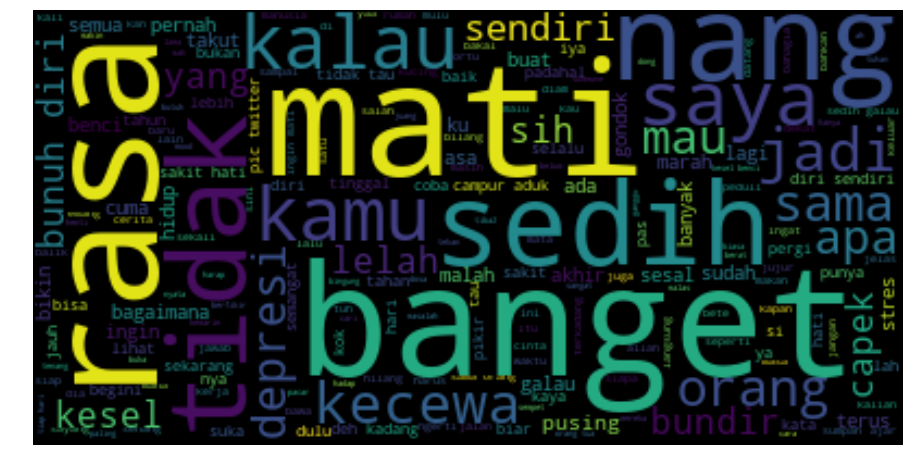

In [16]:
plot_word_cloud(data[data['is_depressed'] == True]['cleaned'])

## Word Cloud untuk Tweet yang Terdeteksi Healthy (Tidak Depresi)

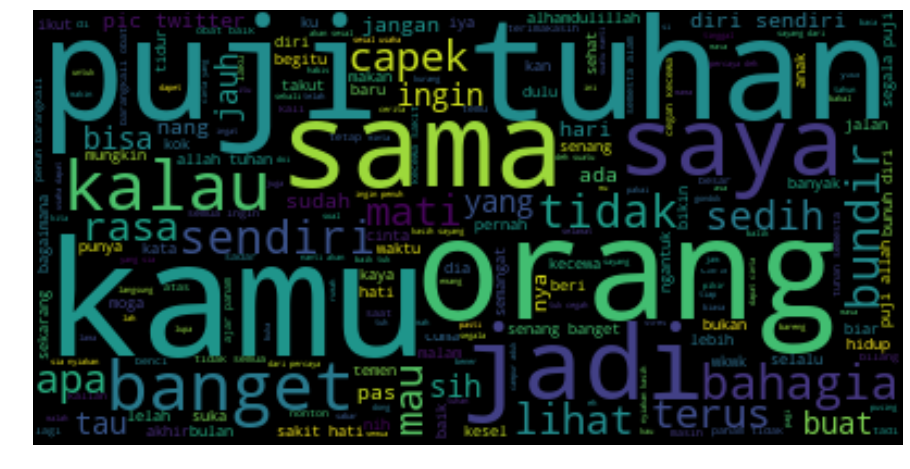

In [17]:
plot_word_cloud(data[data['is_depressed'] == False]['cleaned'])

## 3. Feature Extraction

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def extract_tf_idf(tweet_list):
    vectorizer = TfidfVectorizer(max_features=2000, min_df=5,) # inisiasi fungsi TF IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(np.array(tweet_list)).toarray()
    return tfidf_matrix

def extract_bag_of_words(tweet_list):
    vectorizer = CountVectorizer(max_features=2000, min_df=2, max_df=0.7)  
    return vectorizer.fit_transform(np.array(tweet_list)).toarray()

In [19]:
bag_of_words_feature = extract_bag_of_words(cleaned)
tf_idf_feature = extract_tf_idf(cleaned)

## 4. Classification

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

def classify(feature, label):
    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        LinearSVC()
    ]
    for classifier in classifiers:
        scores = cross_val_score(classifier, feature, label, cv=10)
        print("="*30)
        print(classifier.__class__.__name__)
        print('****Results****')
        print("Accuracy: %f (+/- %.2f)" % (scores.mean(), scores.std() * 2))
        print("="*30 + "\n")

In [21]:
classify(tf_idf_feature, data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.641587 (+/- 0.22)

DecisionTreeClassifier
****Results****
Accuracy: 0.601970 (+/- 0.29)

LinearSVC
****Results****
Accuracy: 0.639078 (+/- 0.23)



In [22]:
classify(bag_of_words_feature, data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.676256 (+/- 0.25)

DecisionTreeClassifier
****Results****
Accuracy: 0.599733 (+/- 0.23)

LinearSVC
****Results****
Accuracy: 0.634475 (+/- 0.23)



In [23]:
classify(np.concatenate((bag_of_words_feature, tf_idf_feature), axis=1), data['is_depressed'])

KNeighborsClassifier
****Results****
Accuracy: 0.681090 (+/- 0.26)

DecisionTreeClassifier
****Results****
Accuracy: 0.591328 (+/- 0.30)

LinearSVC
****Results****
Accuracy: 0.639150 (+/- 0.23)

